ARIMA modelio sudarymas

In [3]:
library(zoo)
library(ggplot2)
library(dplyr)
library(forecast)
library(dynlm)
library(urca)
library(fUnitRoots)
library(ggfortify)
library(data.table)
library(tseries)
library(dplyr)
library(aTSA)
library(OECD)
library(lmtest)

In [4]:
options(repr.plot.width = 20)
options(repr.plot.height = 6)

In [8]:
duom <-read.csv("duomenys.csv", header=T)
unts<- ts(duom$UN,start=c(1969,1),end=c(2018,4), frequency=4)

In [9]:
head(duom)

,X,TIME,UN,GDP,INF,diff_UN
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1968-01-01,2.500000,2.3859726,1.3074394,0.000000
2,2,1968-04-01,1.800000,3.4119312,0.9974523,-0.700000
3,3,1968-07-01,1.633333,2.2639715,0.8981070,-0.166667
4,4,1968-10-01,1.300000,5.6975458,1.8545946,-0.333333
5,5,1969-01-01,2.366667,0.8794613,0.4117960,1.066667
6,6,1969-04-01,1.900000,2.9116578,2.0420755,-0.466667


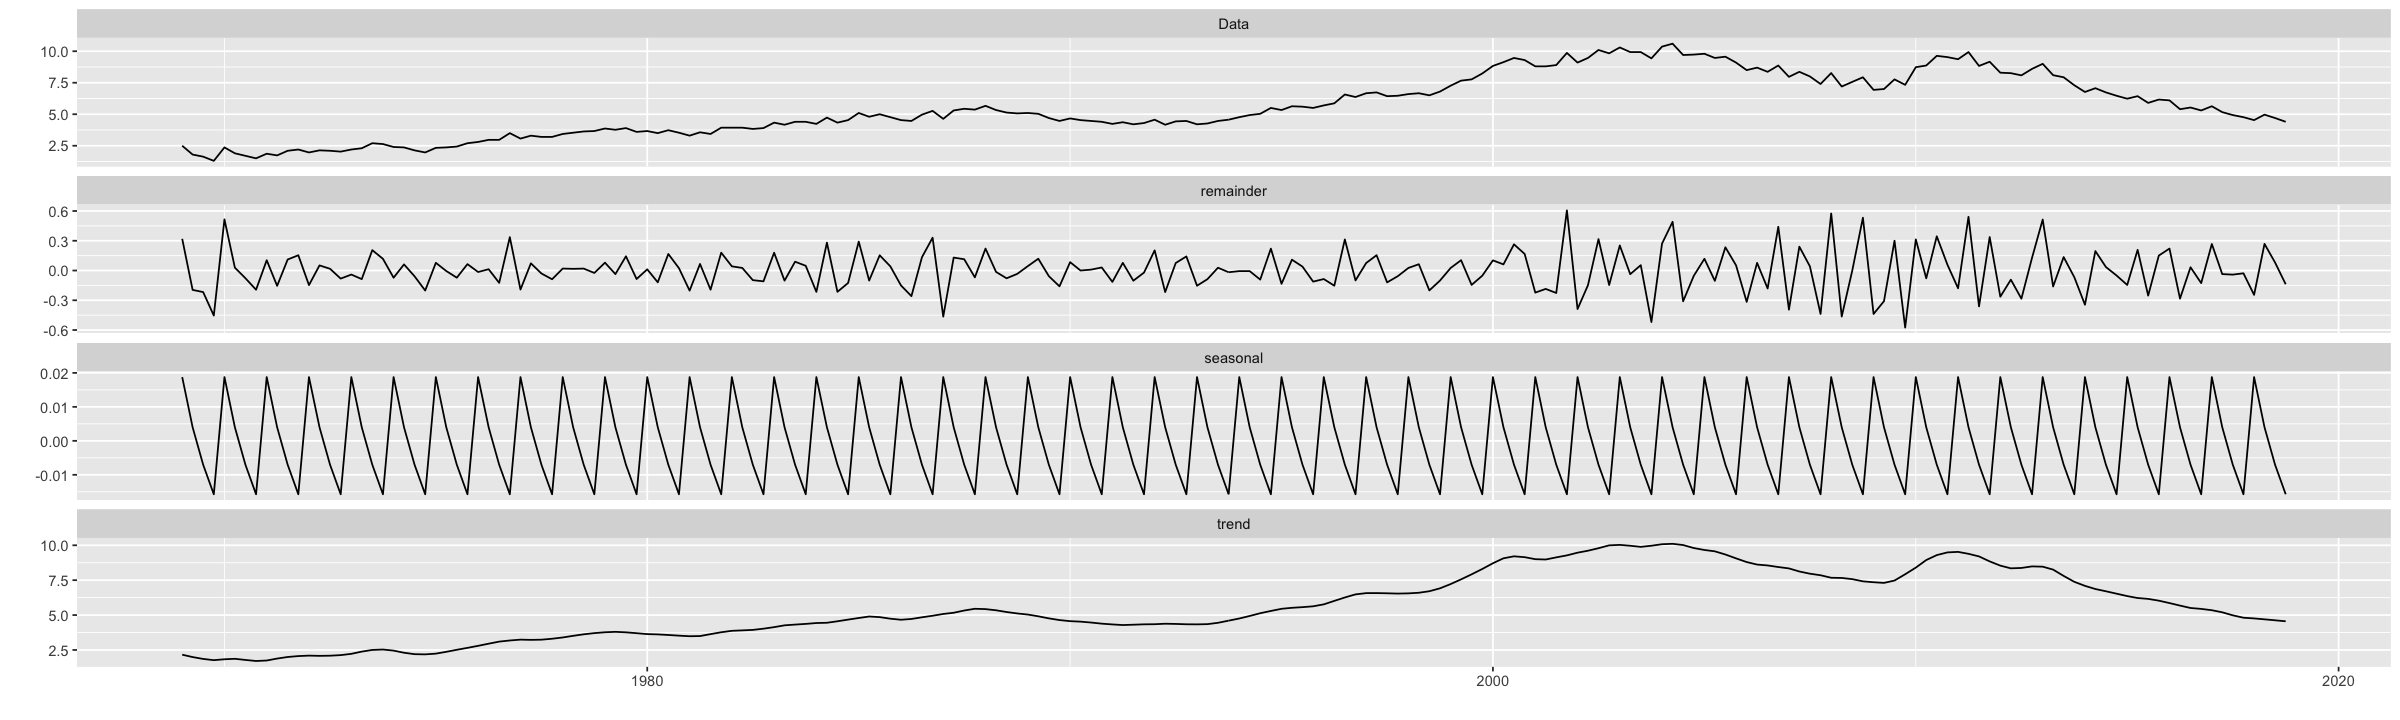

In [10]:
decomp = stl(unts, s.window="periodic")
deseasonal_ts <- seasadj(decomp)
autoplot(decomp)

In [11]:
adf.test(deseasonal_ts)

final_ts <- diff(deseasonal_ts, d = 1)

adf.test(final_ts)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag     ADF p.value
[1,]   0 -0.2545   0.570
[2,]   1 -0.0117   0.640
[3,]   2 -0.0192   0.638
[4,]   3 -0.1266   0.607
[5,]   4 -0.1592   0.598
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.44   0.541
[2,]   1 -1.45   0.537
[3,]   2 -1.58   0.492
[4,]   3 -1.83   0.396
[5,]   4 -1.43   0.544
Type 3: with drift and trend 
     lag     ADF p.value
[1,]   0 -0.5931   0.977
[2,]   1  0.3314   0.990
[3,]   2  0.2707   0.990
[4,]   3 -0.3072   0.990
[5,]   4 -0.0476   0.990
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -18.89    0.01
[2,]   1 -10.75    0.01
[3,]   2  -7.03    0.01
[4,]   3  -6.52    0.01
[5,]   4  -5.18    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -18.87    0.01
[2,]   1 -10.76    0.01
[3,]   2  -7.05    0.01
[4,]   

Pradinė eilutė yra nestacionari, tačiau skirumai yra stacionarūs, todel integruotumo eilė yra 1.

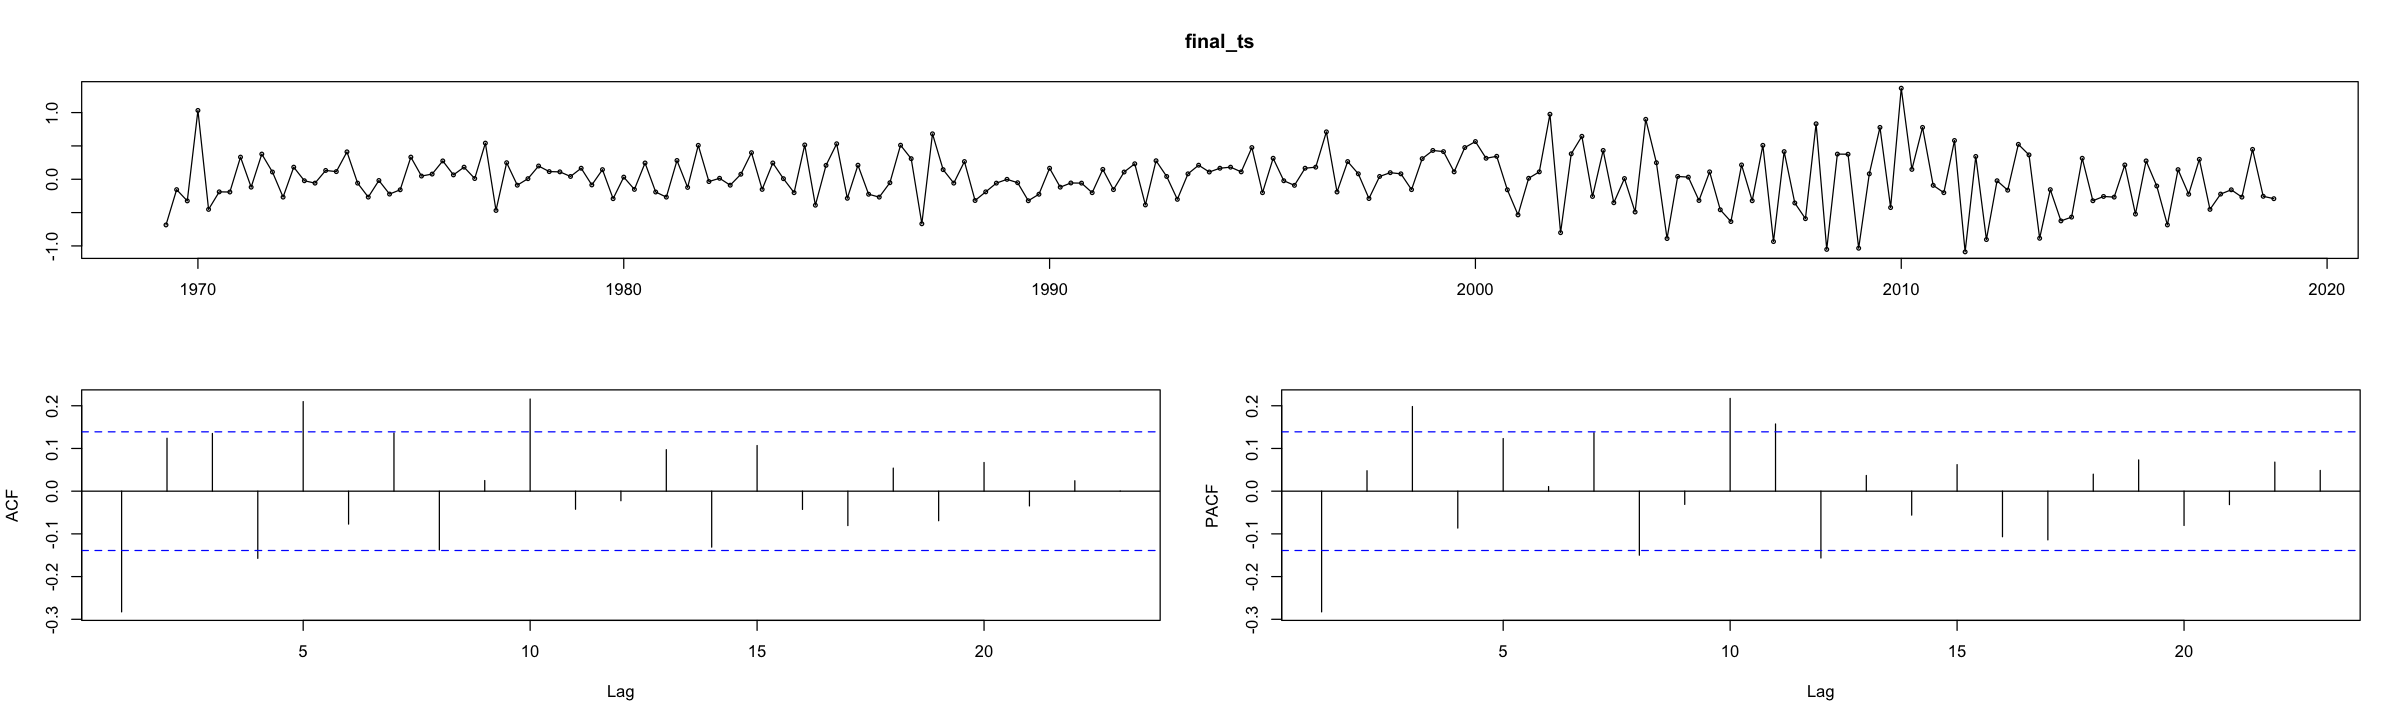

In [12]:
forecast::tsdisplay(final_ts)

iš ACF ir PACF matome, kad ARIMA eilė pradiniams duomenimis ARIMA(3,1,0)/ ARIMA(0,1,1).

In [13]:
unts<- deseasonal_ts

In [14]:
training <-window(unts, end=c(2012,4))
test <-window(unts, start=c(2013,1))

In [15]:
fit1 <- Arima(training, order= c(3,1,0), include.drift = T)


	Ljung-Box test

data:  Residuals from ARIMA(3,1,0) with drift
Q* = 10.048, df = 4, p-value = 0.03962

Model df: 4.   Total lags used: 8



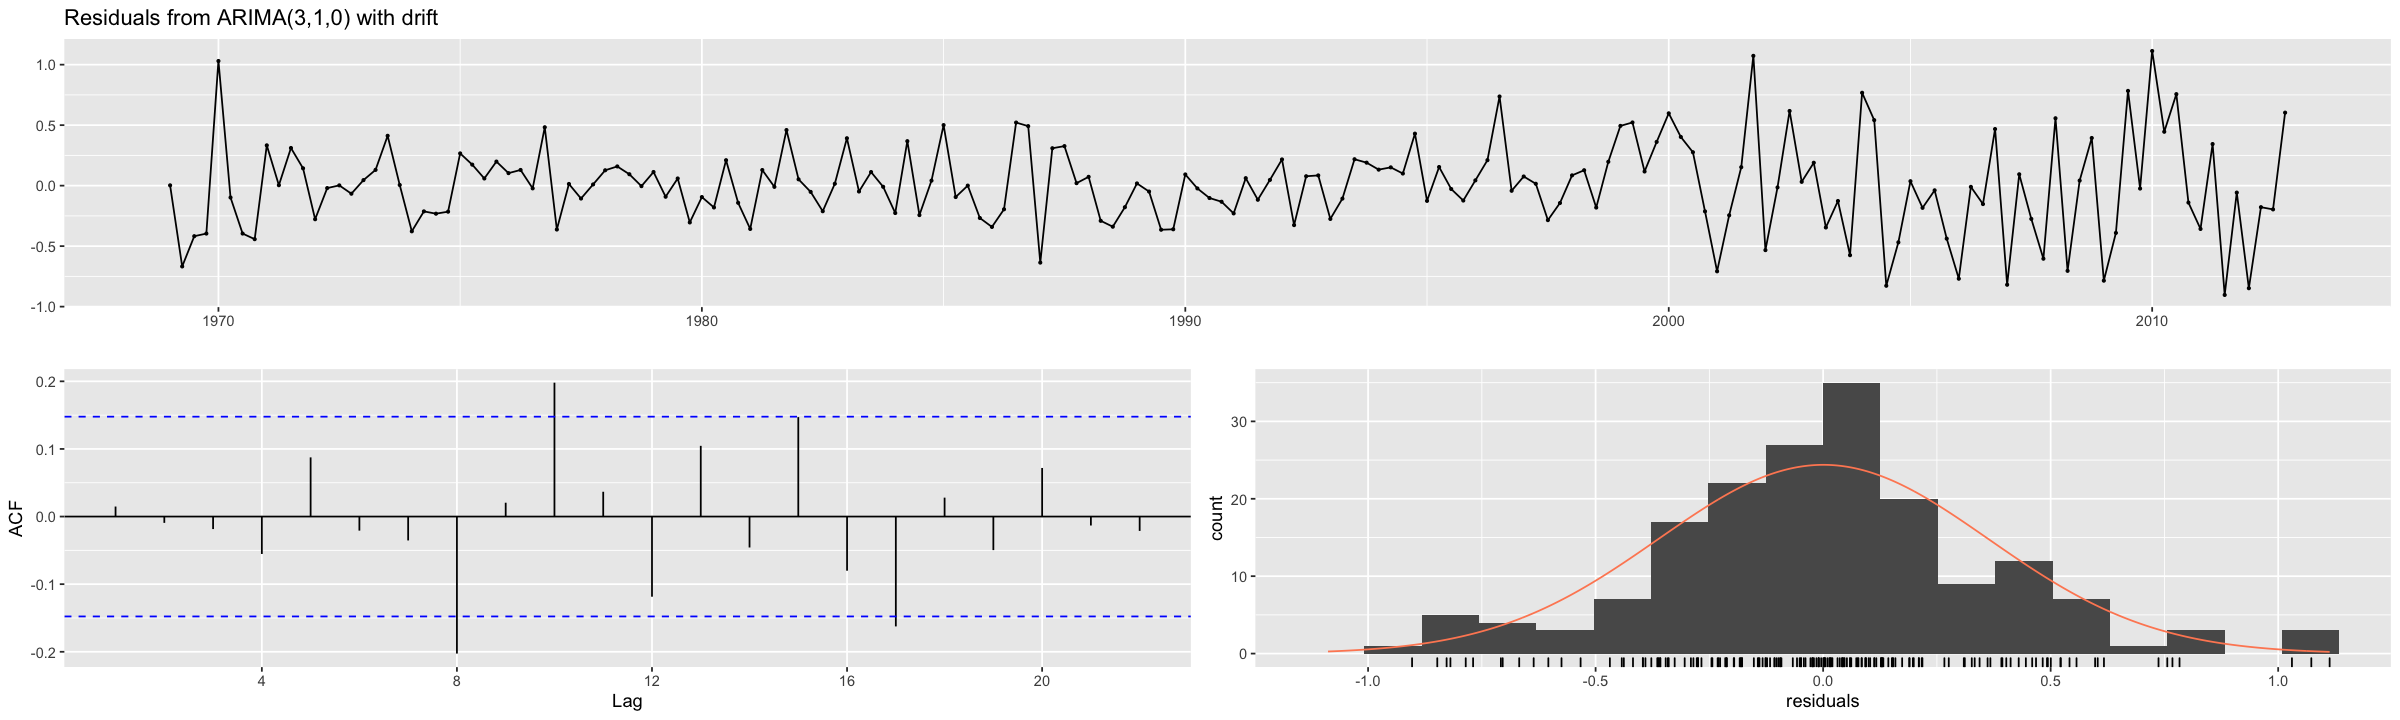

In [16]:
checkresiduals(fit1)


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1) with drift
Q* = 16.014, df = 6, p-value = 0.01368

Model df: 2.   Total lags used: 8



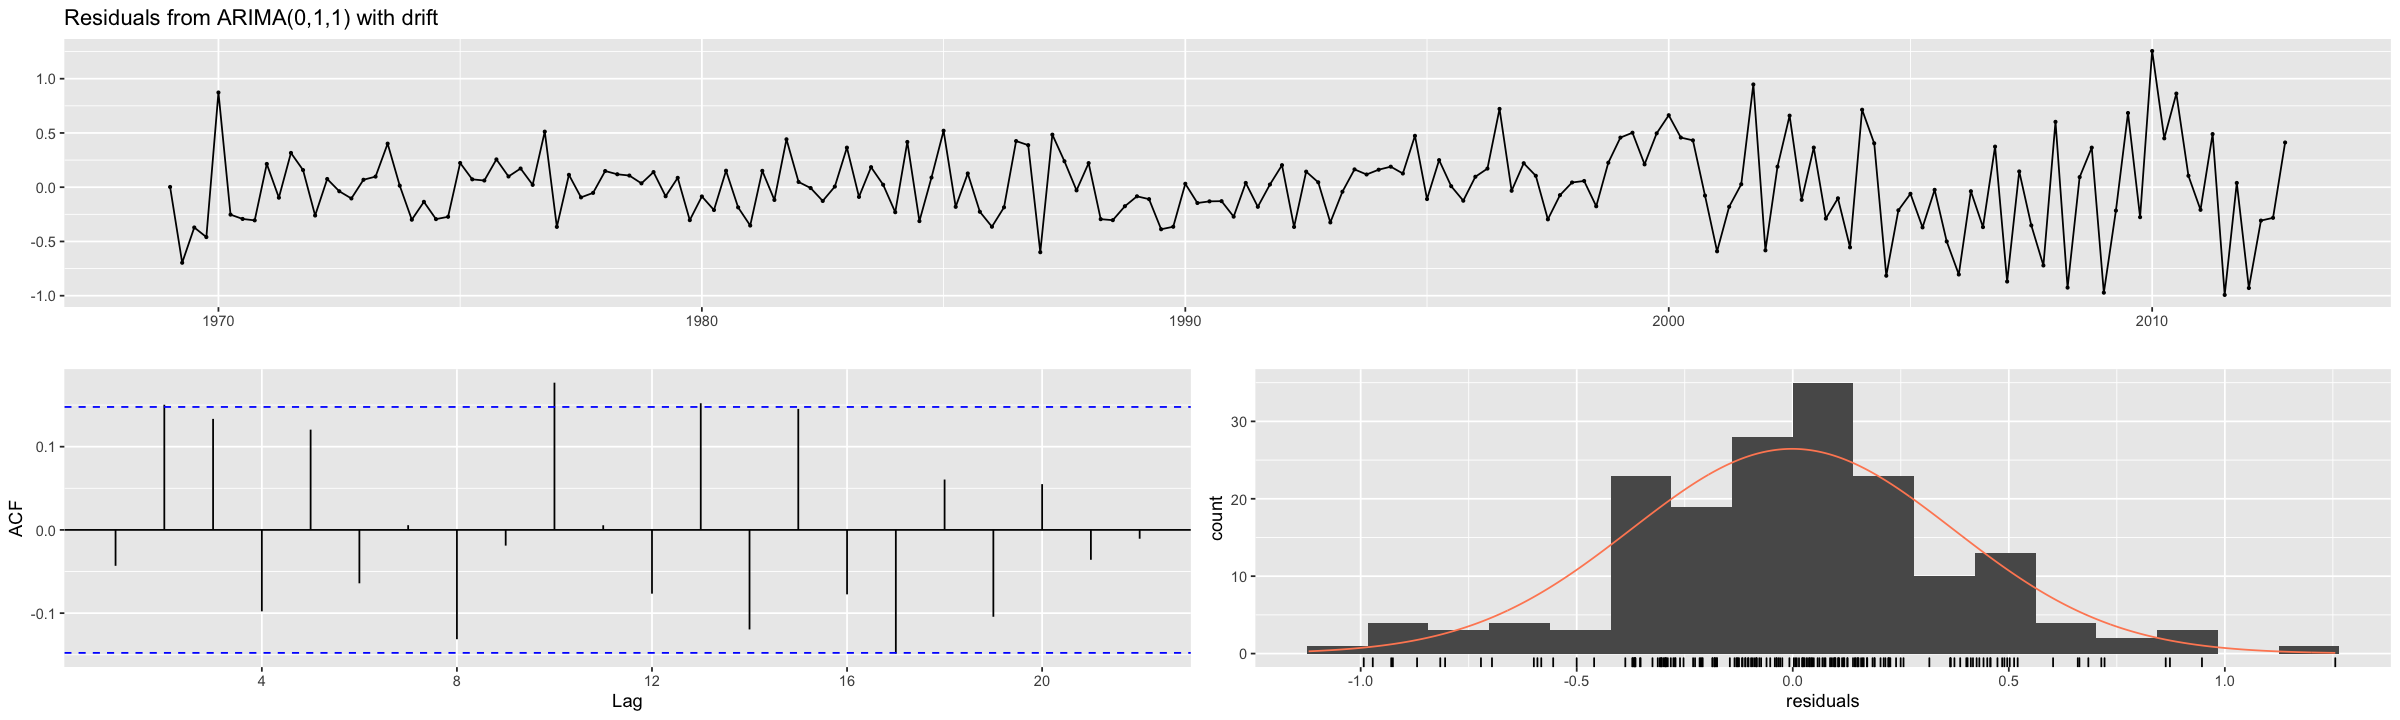

In [17]:
fit2 <- Arima(training, order= c(0,1,1), include.drift = T)
checkresiduals(fit2)

Abiejų modelių liekanos yra koreliuotos. Modeliai nėra adekvatūs.

Modeliavimas su auto.arima. Negerai, bet galbūt parinkus modelį pagal mažiausią AIC reikšmę, liekanos bus baltasis triukšmas.

In [18]:
fit3 <- auto.arima(training, trace=T, seasonal = F)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)           with drift         : 151.8173
 ARIMA(0,1,0)           with drift         : 173.5646
 ARIMA(1,1,0)           with drift         : 153.4782
 ARIMA(0,1,1)           with drift         : 159.8459
 ARIMA(0,1,0)                              : 172.9216
 ARIMA(1,1,2)           with drift         : 151.5086
 ARIMA(0,1,2)           with drift         : 155.13
 ARIMA(1,1,1)           with drift         : 155.5494
 ARIMA(1,1,3)           with drift         : 153.6411
 ARIMA(0,1,3)           with drift         : 157.1631
 ARIMA(2,1,1)           with drift         : 156.3277
 ARIMA(2,1,3)           with drift         : 148.2423
 ARIMA(3,1,3)           with drift         : 124.0789
 ARIMA(3,1,2)           with drift         : 136.2048
 ARIMA(4,1,3)           with drift         : 122.0564
 ARIMA(4,1,2)           with drift         : 140.7217
 ARIMA(5,1,3)           with drift         : 136.0309
 ARIMA(4,1,4)          


	Ljung-Box test

data:  Residuals from ARIMA(3,1,2) with drift
Q* = 6.7405, df = 3, p-value = 0.08064

Model df: 6.   Total lags used: 9



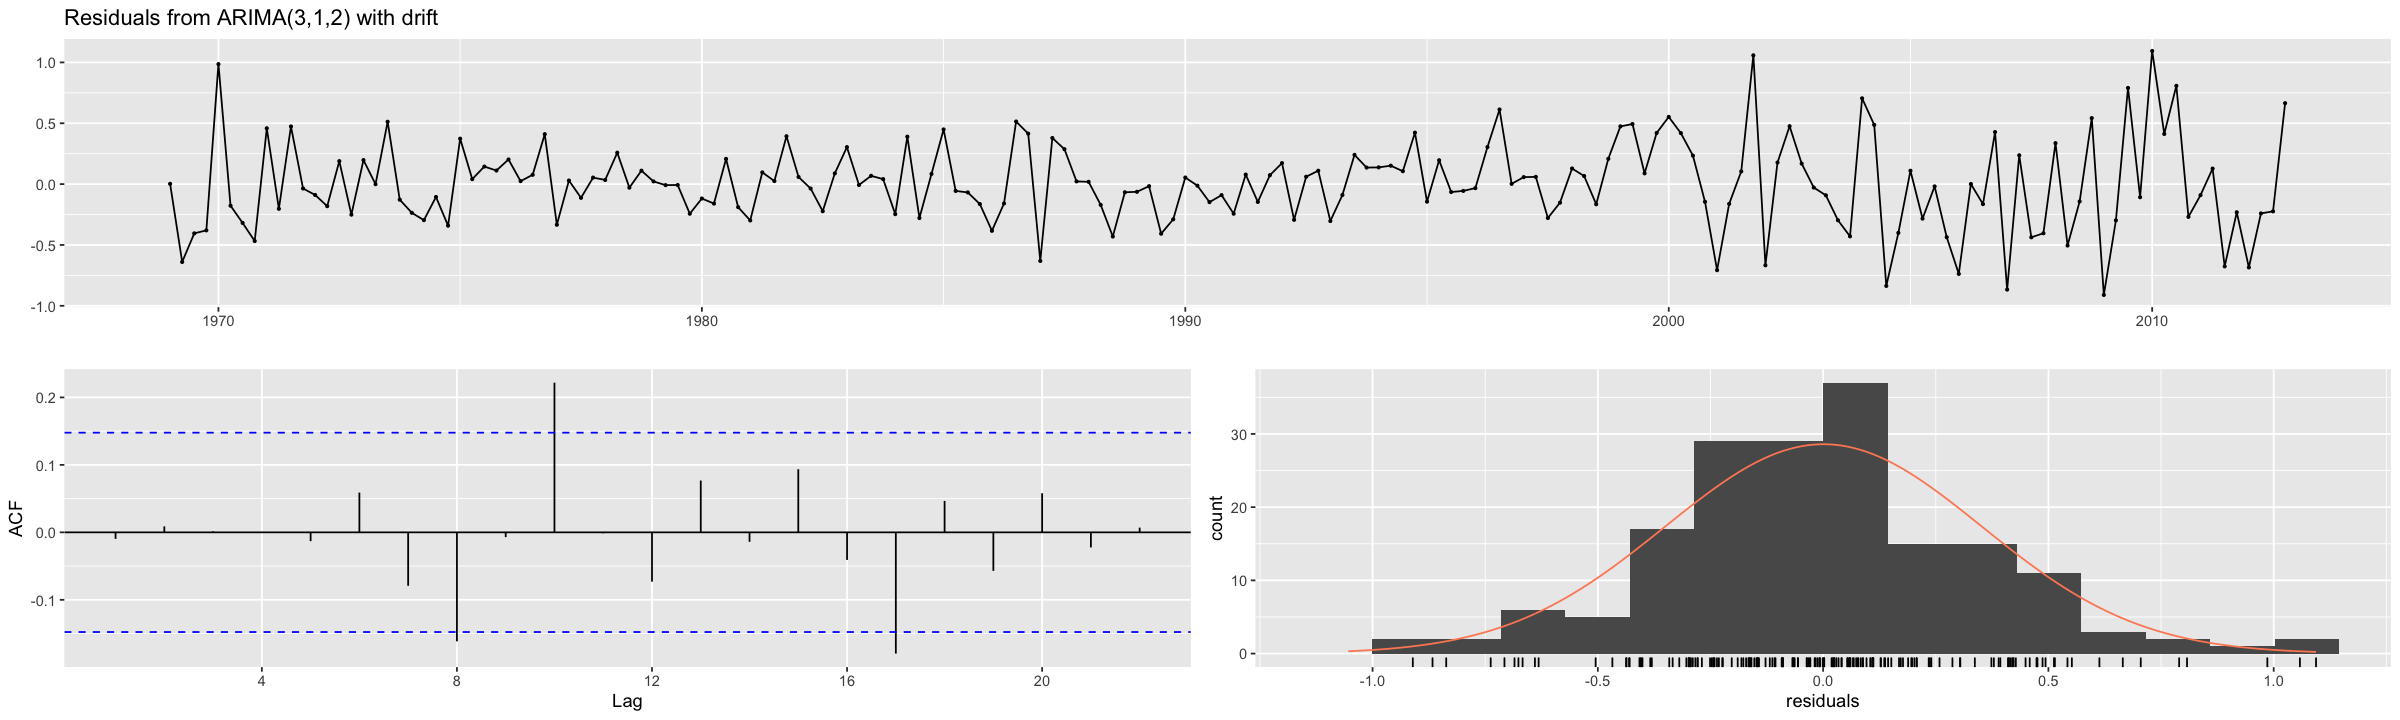

In [19]:
checkresiduals(fit3)

Taigi, modelis parinktas ARIMA(3,1,2). Netoli yra ir ARIMA (3,1,1) parinktas ir pagal ACF ir PAF grafikus, nors ir ACF antras lag yra nereikšmingas. Šio modelio liekanos yra baltasis triukšmas, kad indikuoja, kad modelis yra adekvatus.

In [20]:
fit3 %>% forecast::forecast(h=length(test)) -> fc1

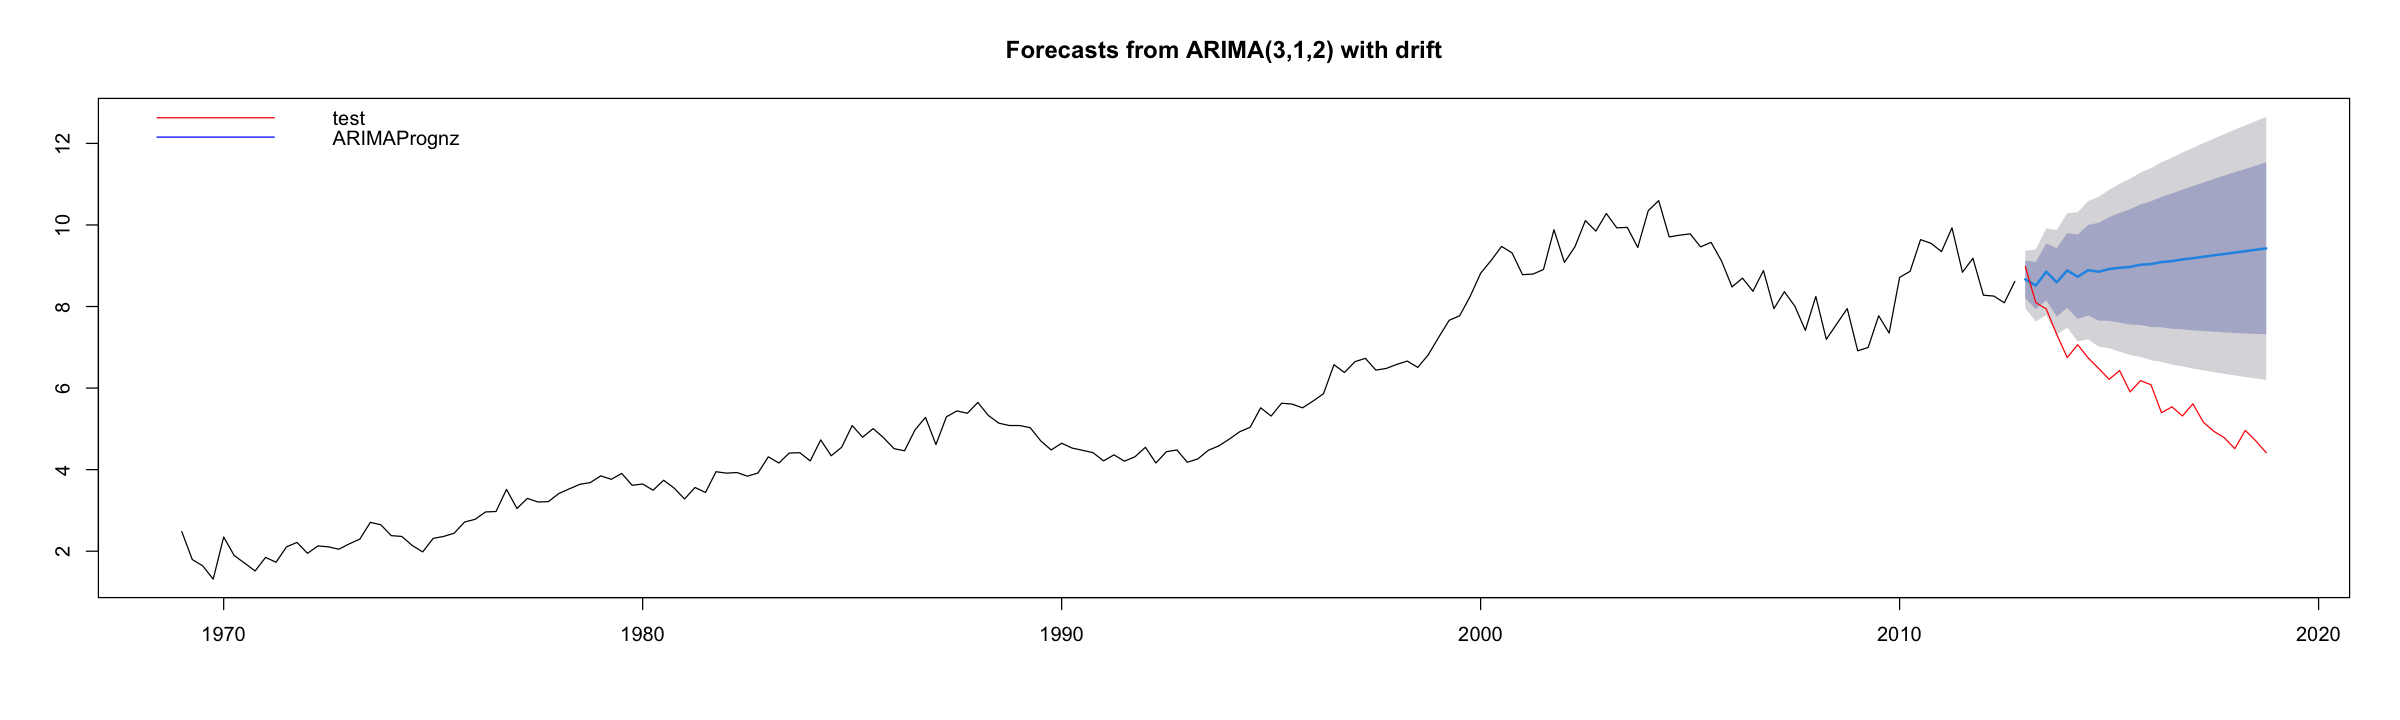

In [21]:
plot(fc1)
lines(test, col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","ARIMAPrognz")) 

Kita vertus prognozės į pievas ir lankas.

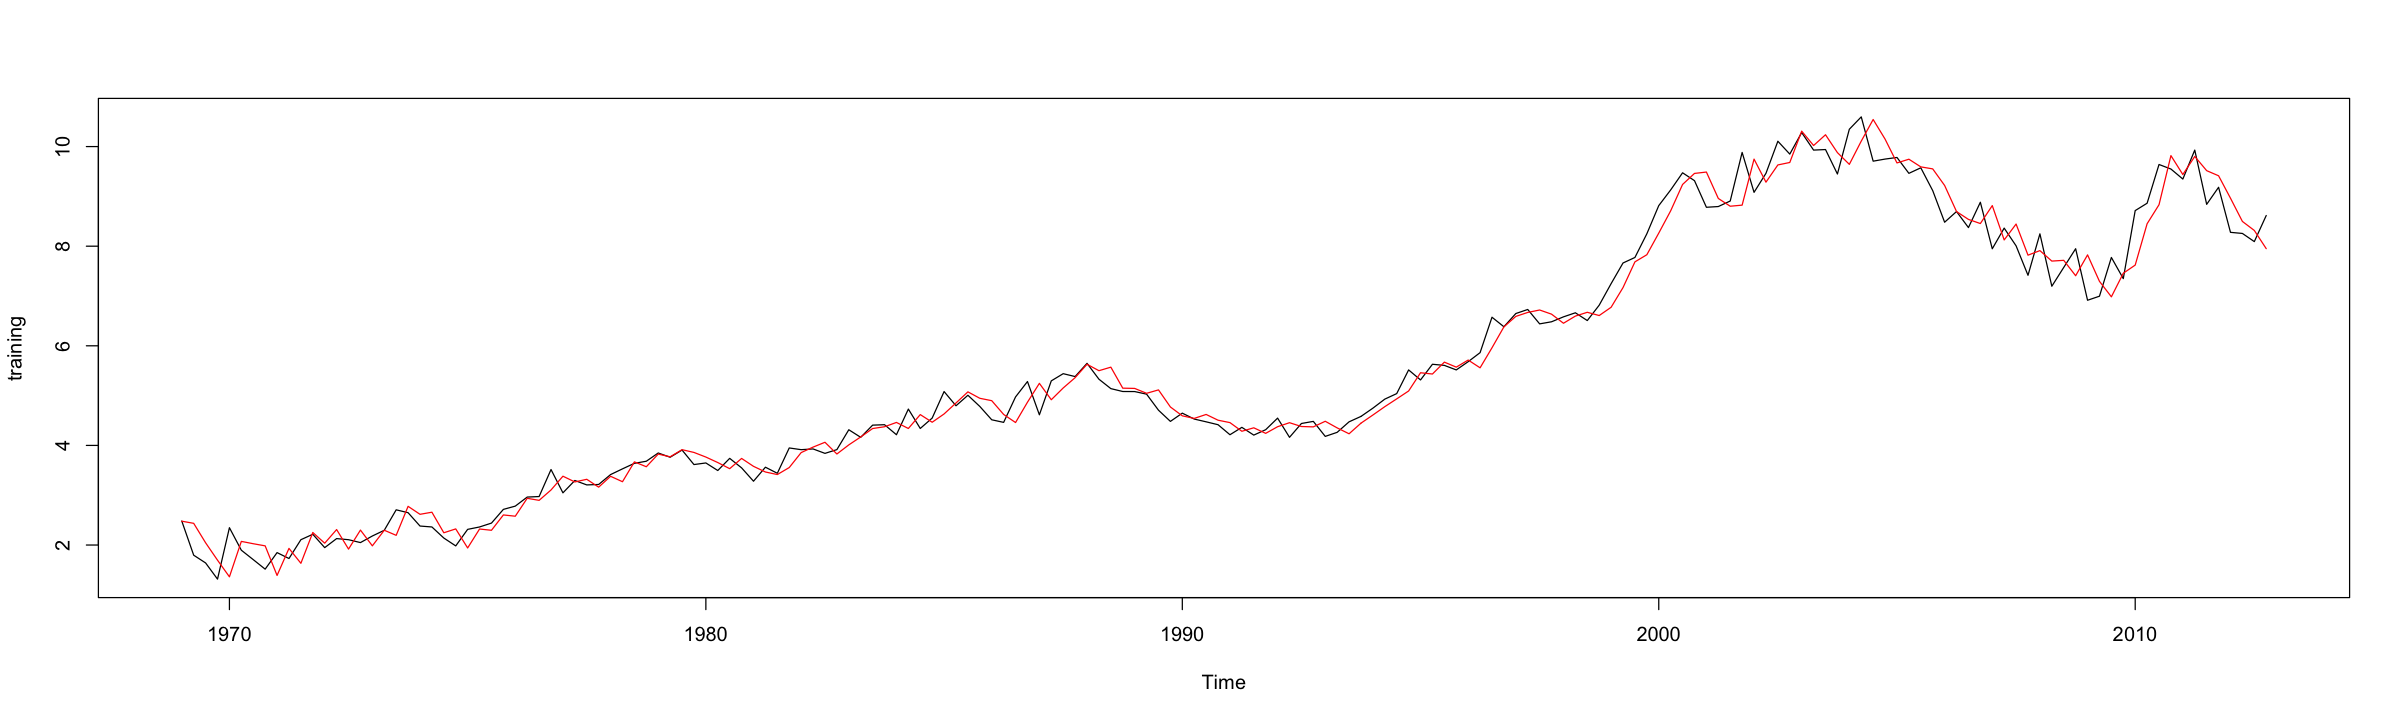

In [22]:
plot(training)
lines(fit3$fitted, col = "red")

Naujo modelio sudarymas. 

In [23]:
fit4 <- auto.arima(training, trace=T, seasonal = T)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[4] with drift         : 121.6709
 ARIMA(0,1,0)           with drift         : 173.5646
 ARIMA(1,1,0)(1,0,0)[4] with drift         : 148.5797
 ARIMA(0,1,1)(0,0,1)[4] with drift         : 158.9376
 ARIMA(0,1,0)                              : 172.9216
 ARIMA(2,1,2)(0,0,1)[4] with drift         : 138.0339
 ARIMA(2,1,2)(1,0,0)[4] with drift         : 142.2258
 ARIMA(2,1,2)(2,0,1)[4] with drift         : 122.9599
 ARIMA(2,1,2)(1,0,2)[4] with drift         : 120.6561
 ARIMA(2,1,2)(0,0,2)[4] with drift         : 131.9173
 ARIMA(2,1,2)(2,0,2)[4] with drift         : 124.6671
 ARIMA(1,1,2)(1,0,2)[4] with drift         : 119.884
 ARIMA(1,1,2)(0,0,2)[4] with drift         : 131.9451
 ARIMA(1,1,2)(1,0,1)[4] with drift         : 122.3977
 ARIMA(1,1,2)(2,0,2)[4] with drift         : 114.0396
 ARIMA(1,1,2)(2,0,1)[4] with drift         : 121.4387
 ARIMA(0,1,2)(2,0,2)[4] with drift         : 130.0173
 ARIMA(1,1,1)(2,0,2)[4

Nors ACF ir PACF neindikavo sezoniškumo, geresnis modelis pagal AIC yra su sezonine komponente.


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(2,0,2)[4]
Q* = 9.3571, df = 3, p-value = 0.0249

Model df: 7.   Total lags used: 10



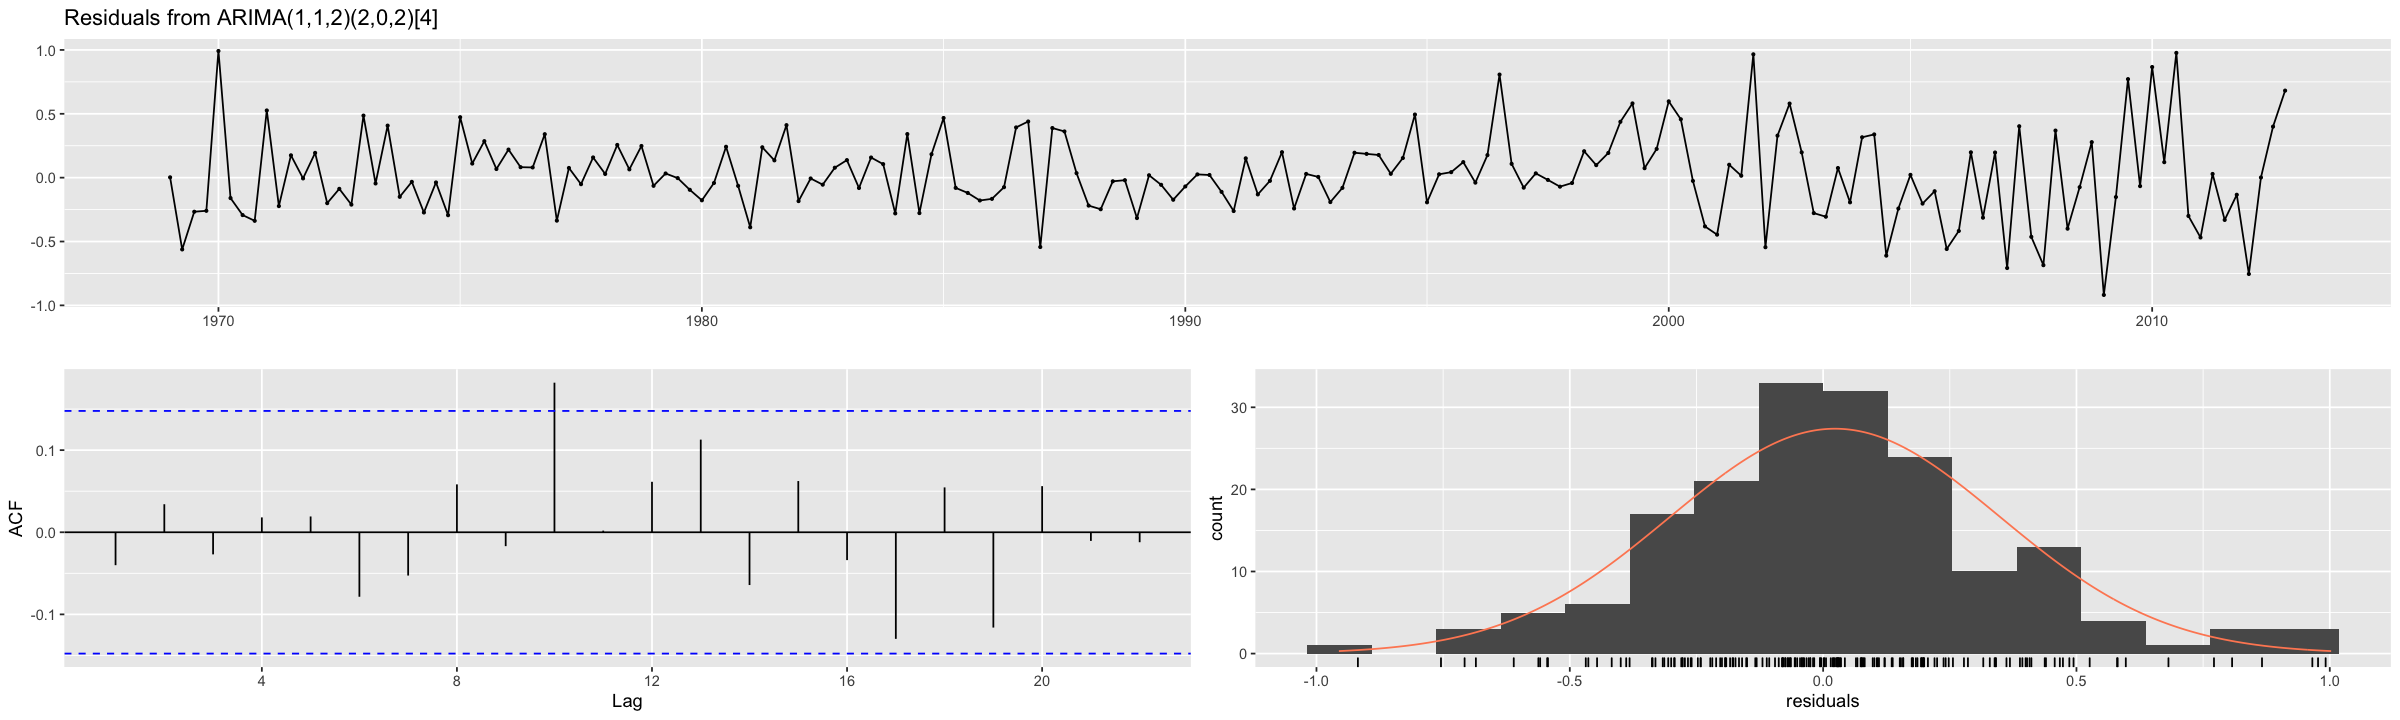

In [24]:
checkresiduals(fit4)

Tačiau liekanos koreliuotos.

Darbo vadovo komentaras:

Nenusezonintiems duomenims pabandykite apriboti auto.arima kad imtų pirmus nesezoninius ir pirmus sezoninius skirtumus – su d = 1 ir D = 1 – kaip atrodytų tokio auto.arima modelio prognozė ir liekanų testai?

In [25]:
unts<- ts(duom$UN,start=c(1968,1),end=c(2018,4), frequency=4)

In [26]:
adf.test(unts)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -0.386   0.533
[2,]   1 -0.191   0.589
[3,]   2 -0.197   0.587
[4,]   3 -0.284   0.562
[5,]   4 -0.320   0.552
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.31   0.587
[2,]   1 -1.28   0.598
[3,]   2 -1.42   0.548
[4,]   3 -1.68   0.451
[5,]   4 -1.29   0.595
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -0.114    0.99
[2,]   1  0.851    0.99
[3,]   2  0.763    0.99
[4,]   3  0.207    0.99
[5,]   4  0.463    0.99
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [27]:
training <-window(unts, end=c(2012,4))
test <-window(unts, start=c(2013,1))

In [28]:
length(test)

[1] 24

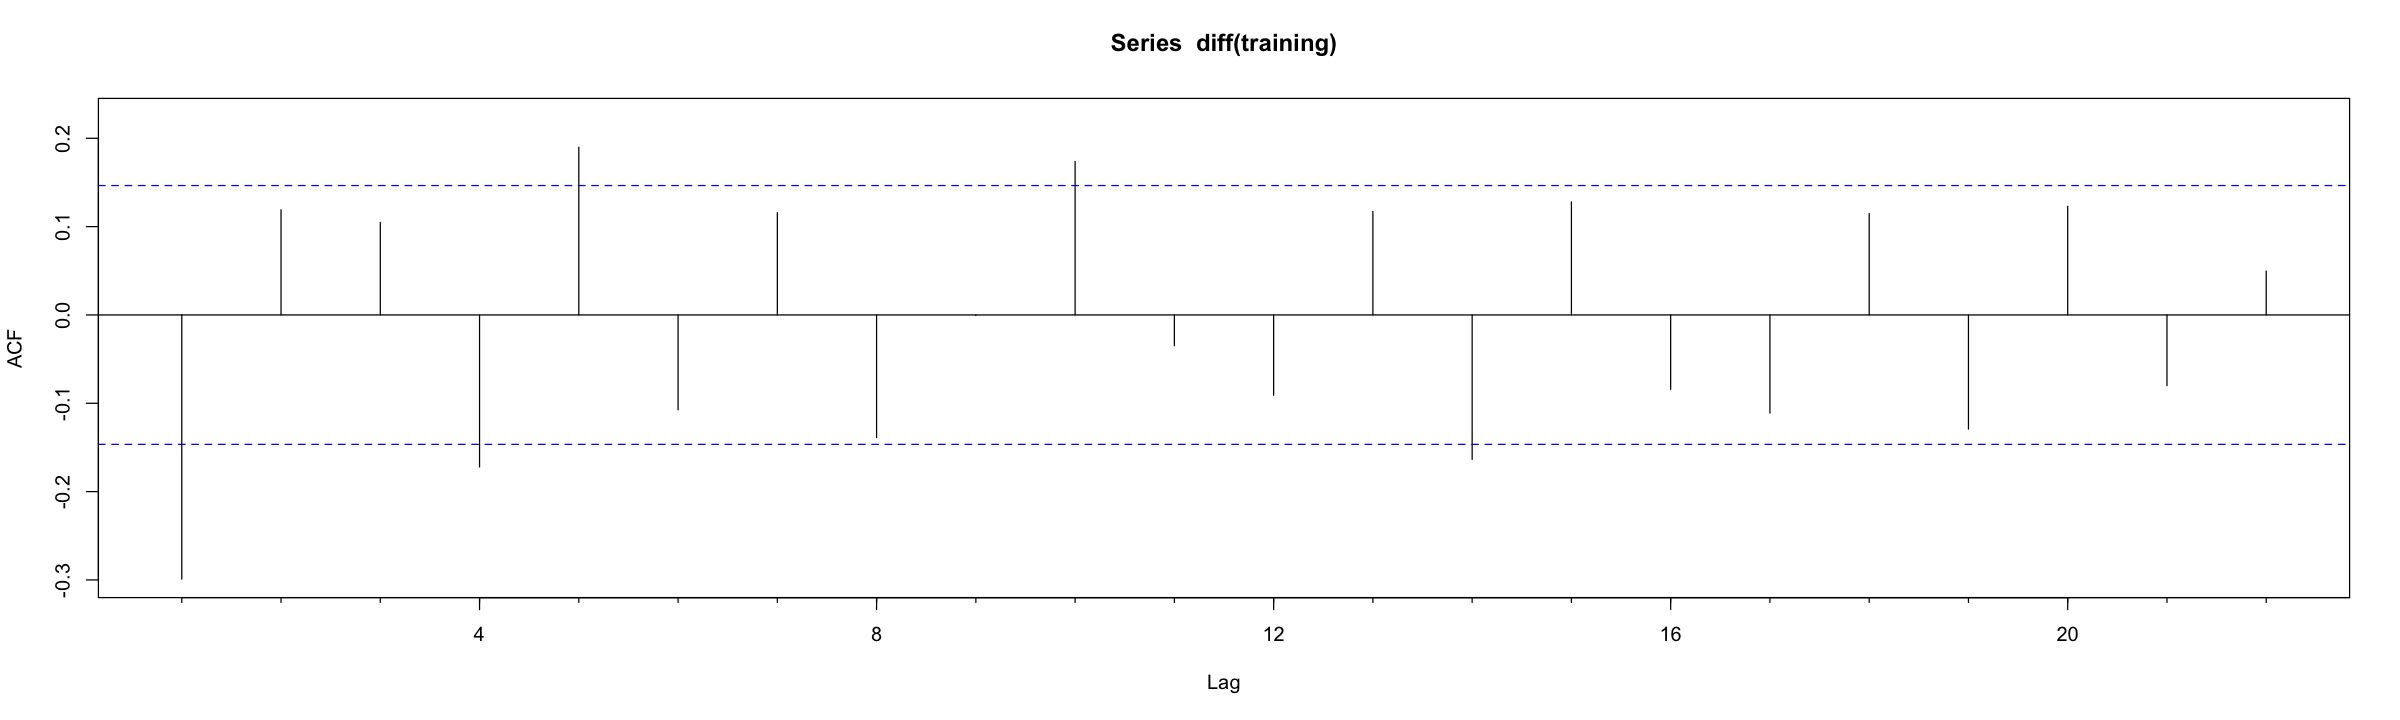

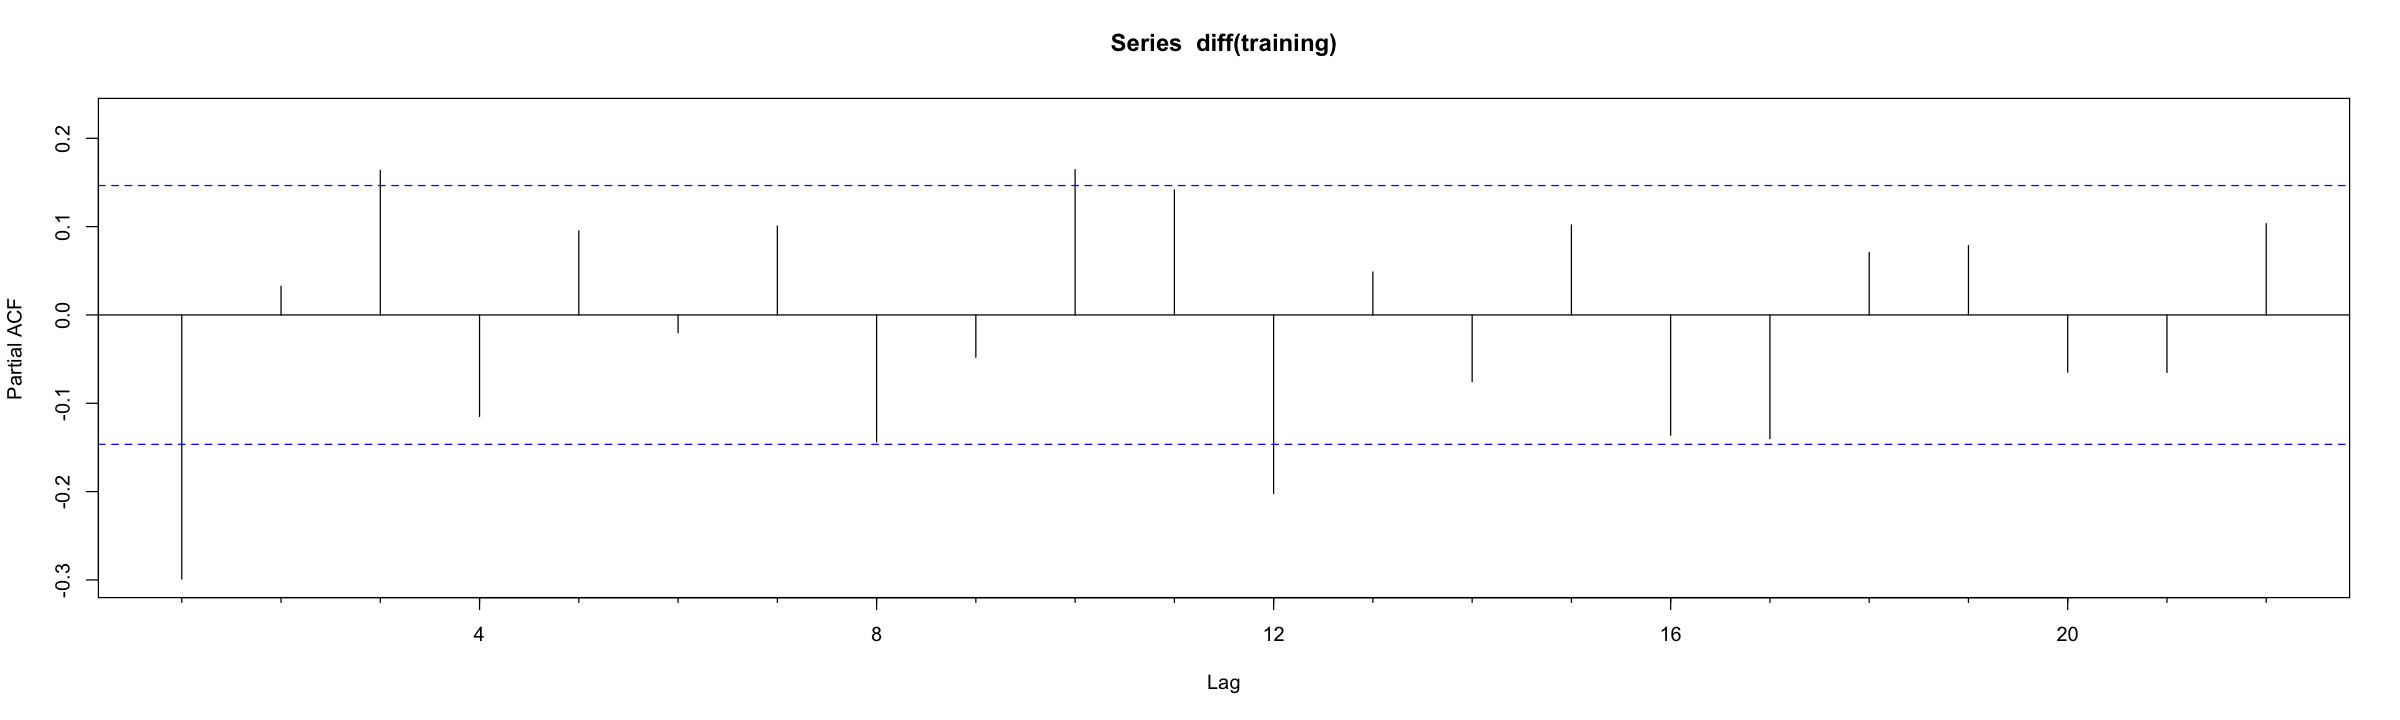

In [29]:
Acf(diff(training))
Pacf(diff(training))

In [30]:
fit5 <- auto.arima(training, d=1, D =1, trace=T)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,1,1)[4]                    : 183.9055
 ARIMA(0,1,0)(0,1,0)[4]                    : 324.6051
 ARIMA(1,1,0)(1,1,0)[4]                    : 255.5912
 ARIMA(0,1,1)(0,1,1)[4]                    : 210.6594
 ARIMA(2,1,2)(0,1,1)[4]                    : 212.6724
 ARIMA(2,1,2)(1,1,0)[4]                    : 233.2956
 ARIMA(2,1,2)(2,1,1)[4]                    : Inf
 ARIMA(2,1,2)(1,1,2)[4]                    : 183.676
 ARIMA(2,1,2)(0,1,2)[4]                    : 209.6408
 ARIMA(2,1,2)(2,1,2)[4]                    : Inf
 ARIMA(1,1,2)(1,1,2)[4]                    : 146.743
 ARIMA(1,1,2)(0,1,2)[4]                    : 209.1918
 ARIMA(1,1,2)(1,1,1)[4]                    : 184.715
 ARIMA(1,1,2)(2,1,2)[4]                    : Inf
 ARIMA(1,1,2)(0,1,1)[4]                    : 208.081
 ARIMA(1,1,2)(2,1,1)[4]                    : Inf
 ARIMA(0,1,2)(1,1,2)[4]                    : 183.1962
 ARIMA(1,1,1)(1,1,2)[4]                    : 

In [31]:
summary(fit5)

Series: training 
ARIMA(1,1,0)(1,1,0)[4] 

Coefficients:
          ar1     sar1
      -0.3592  -0.4784
s.e.   0.0720   0.0683

sigma^2 estimated as 0.2352:  log likelihood=-121.26
AIC=248.52   AICc=248.66   BIC=258.02

Training set error measures:
                       ME      RMSE       MAE         MPE     MAPE      MASE
Training set -0.008154072 0.4754839 0.3509497 -0.09199485 6.666763 0.6984102
                    ACF1
Training set -0.01757579


Imam SARIMĄ modelį su d ir D lygiais vienais.


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,1,0)[4]
Q* = 24.185, df = 6, p-value = 0.0004829

Model df: 2.   Total lags used: 8



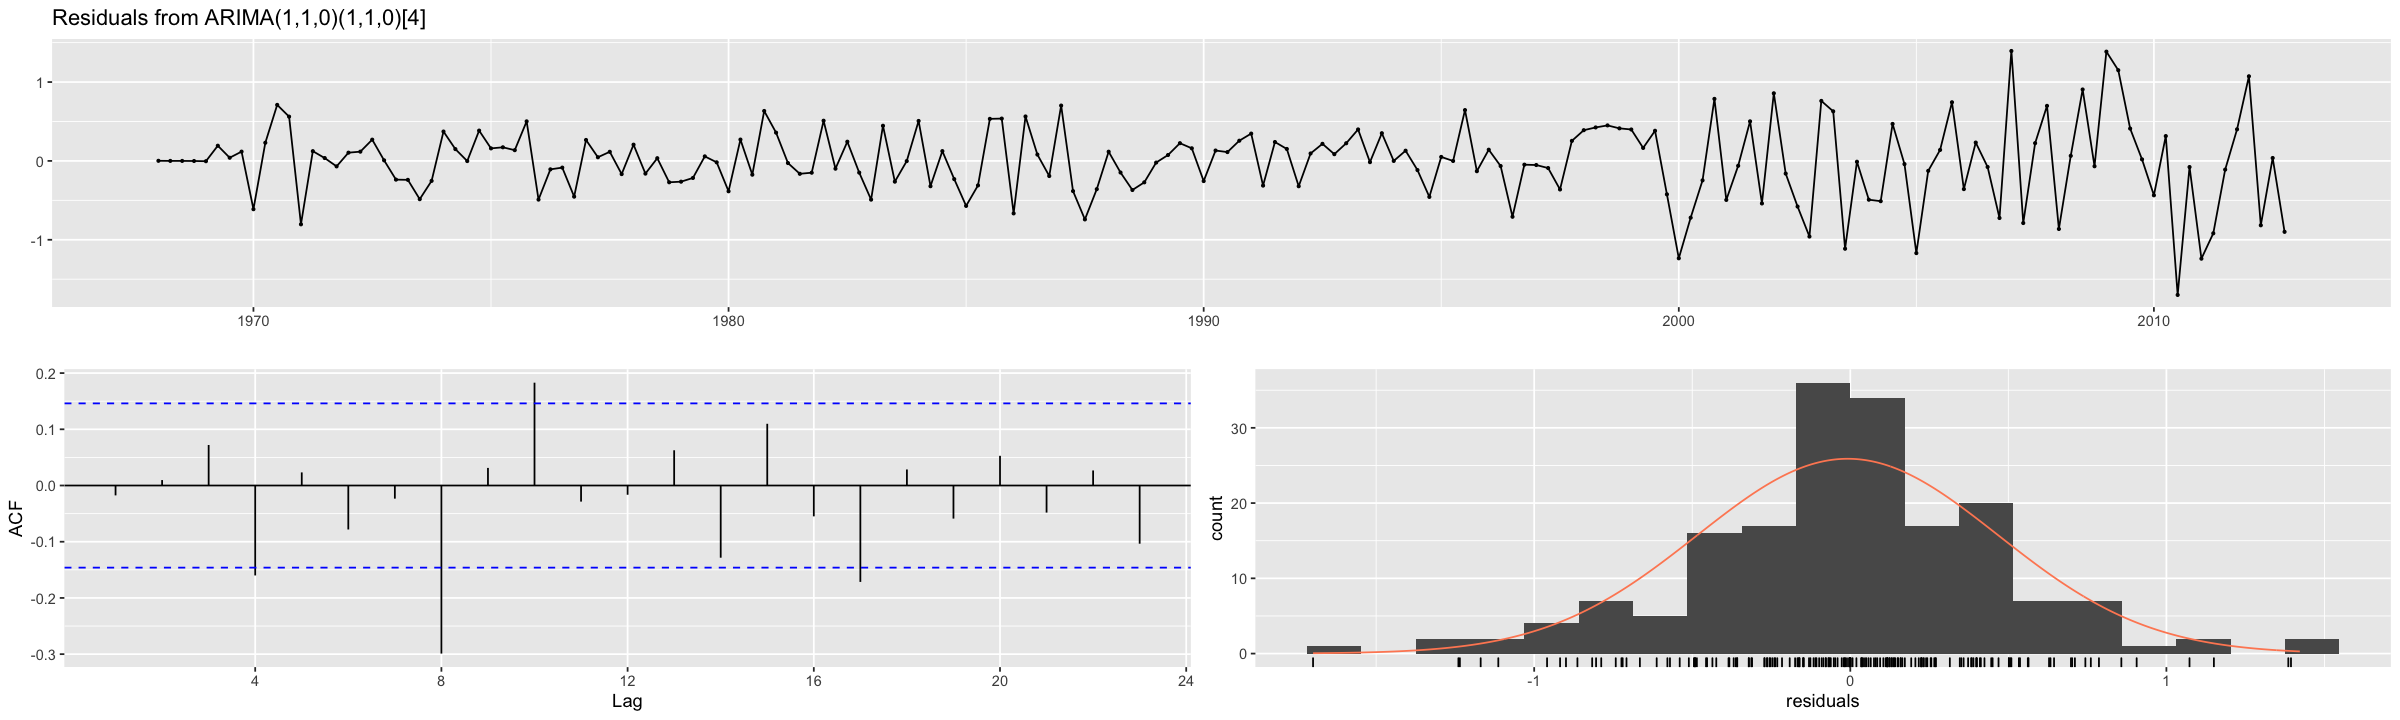

In [32]:
checkresiduals(fit5)

Liekanos koreliuotos...

In [33]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:fBasics’:

    densityPlot


The following object is masked from ‘package:dplyr’:

    recode




In [34]:
library(arm)

Warning message:
“package ‘arm’ was built under R version 4.0.2”
Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix

Loading required package: lme4

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


arm (Version 1.11-2, built: 2020-7-27)


Working directory is /Users/gabriele/Desktop/Mokslai IV kursas/JupyterLab/notebooks/Kursinis



Attaching package: ‘arm’


The following object is masked from ‘package:car’:

    logit




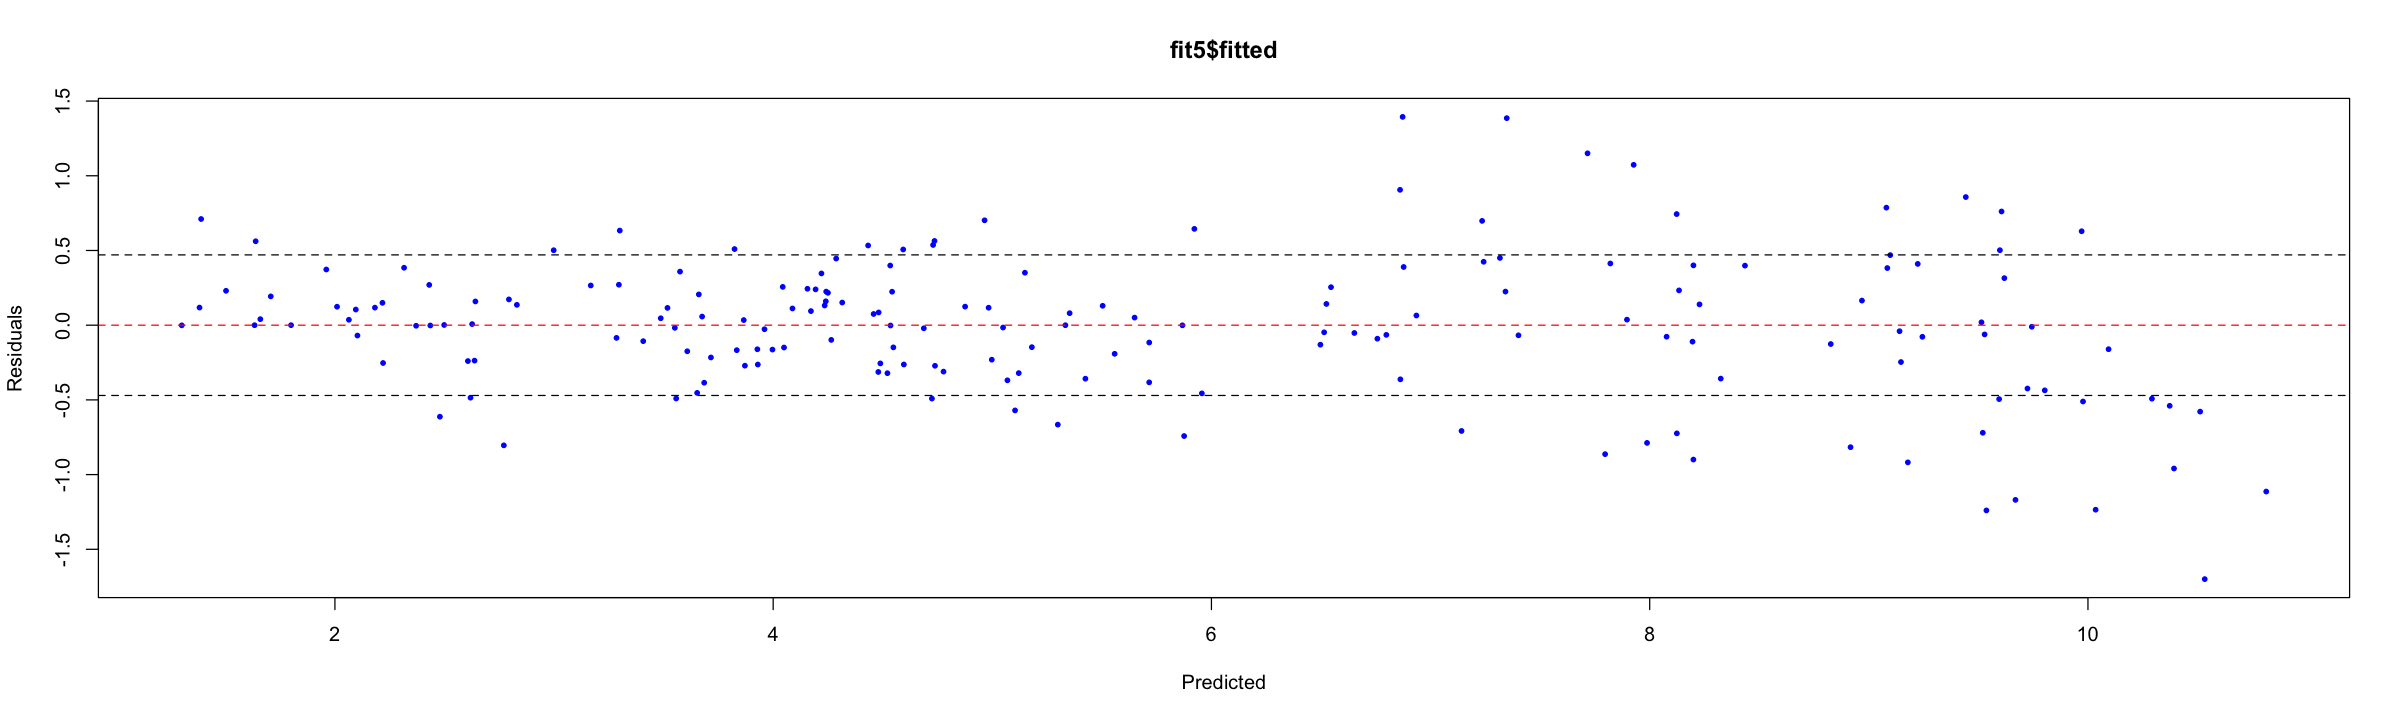

In [35]:
residual.plot(fit5$fitted, fit5$residuals, sigma = fit5$sigma2, 
  col.pts = "blue", col.ctr = "red", col.sgm = "black", cex = 0.5, 
  gray.scale = FALSE, xlab = "Predicted", ylab = "Residuals",)

In [36]:
Box.test(fit5$residuals, type = c("Ljung-Box"))


	Box-Ljung test

data:  fit5$residuals
X-squared = 0.056535, df = 1, p-value = 0.8121


Su kita funkcija viskas gerai, liekanos yra baltasis triukšmas....

In [37]:
fit5 %>% forecast::forecast(h=length(test)) -> fc2

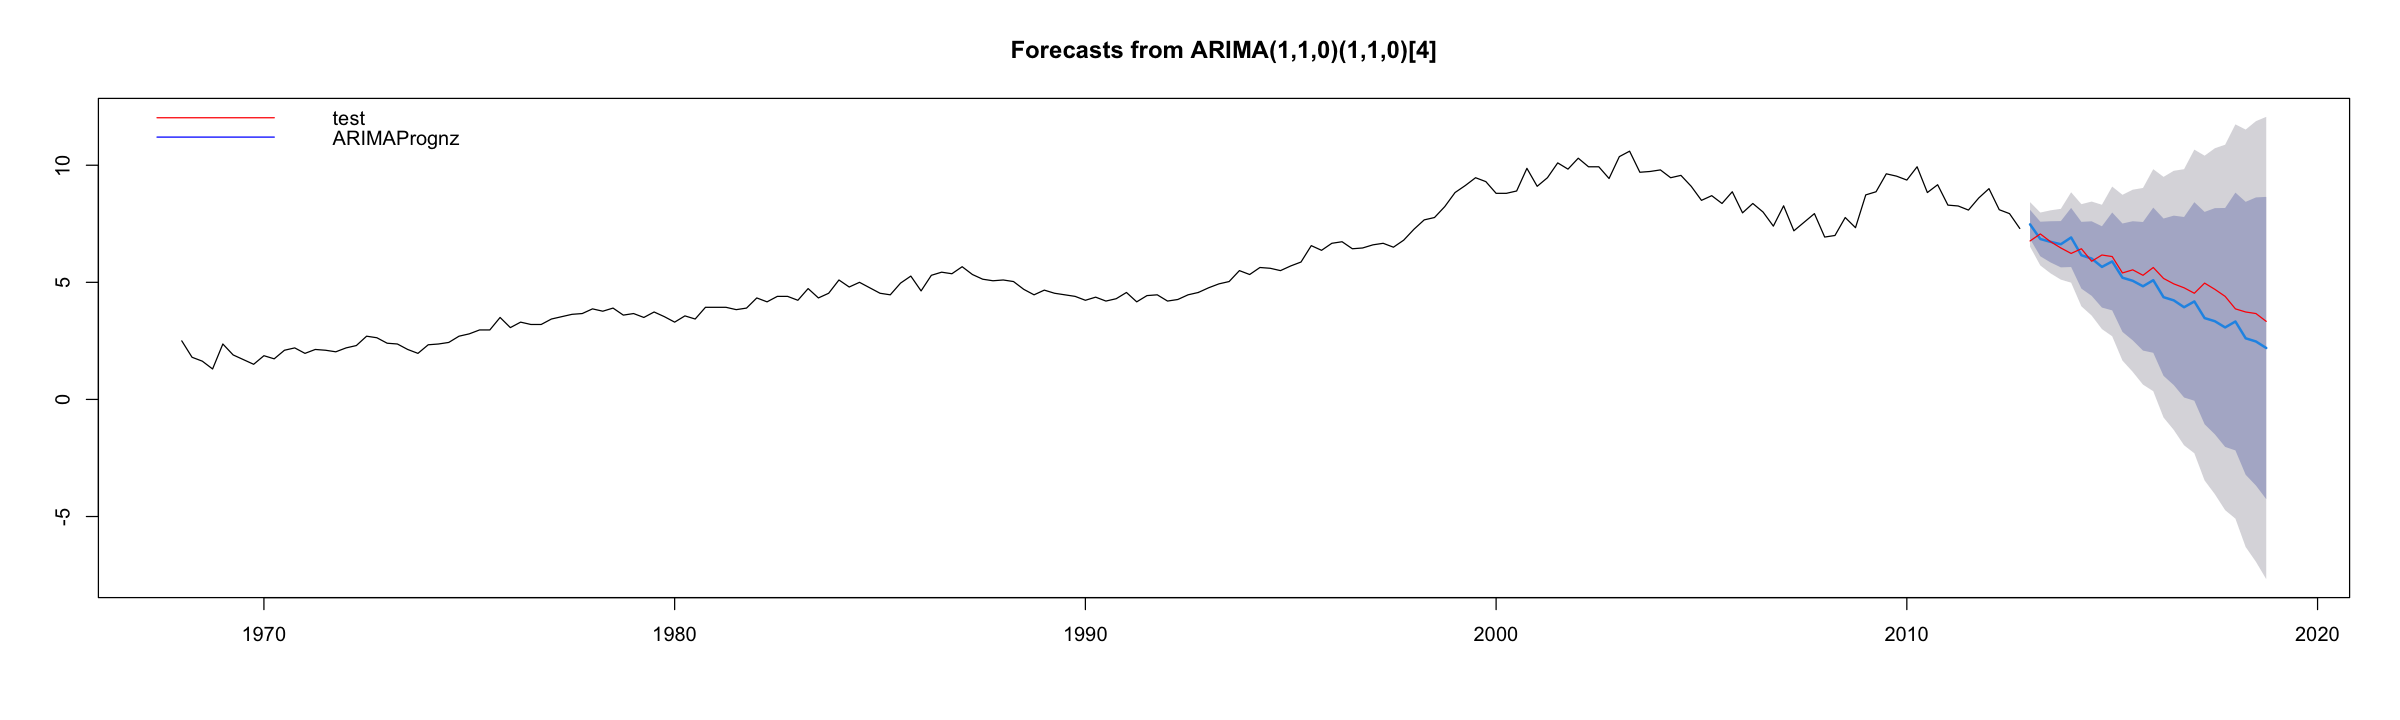

In [38]:
plot(fc2)
lines(test, col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","ARIMAPrognz")) 

In [39]:
fc_tmp <- fc2
fc_tmp$lower[fc_tmp$lower[, 1] < 0, 1] <- 0
fc_tmp$lower[fc_tmp$lower[, 2] < 0, 2] <- 0

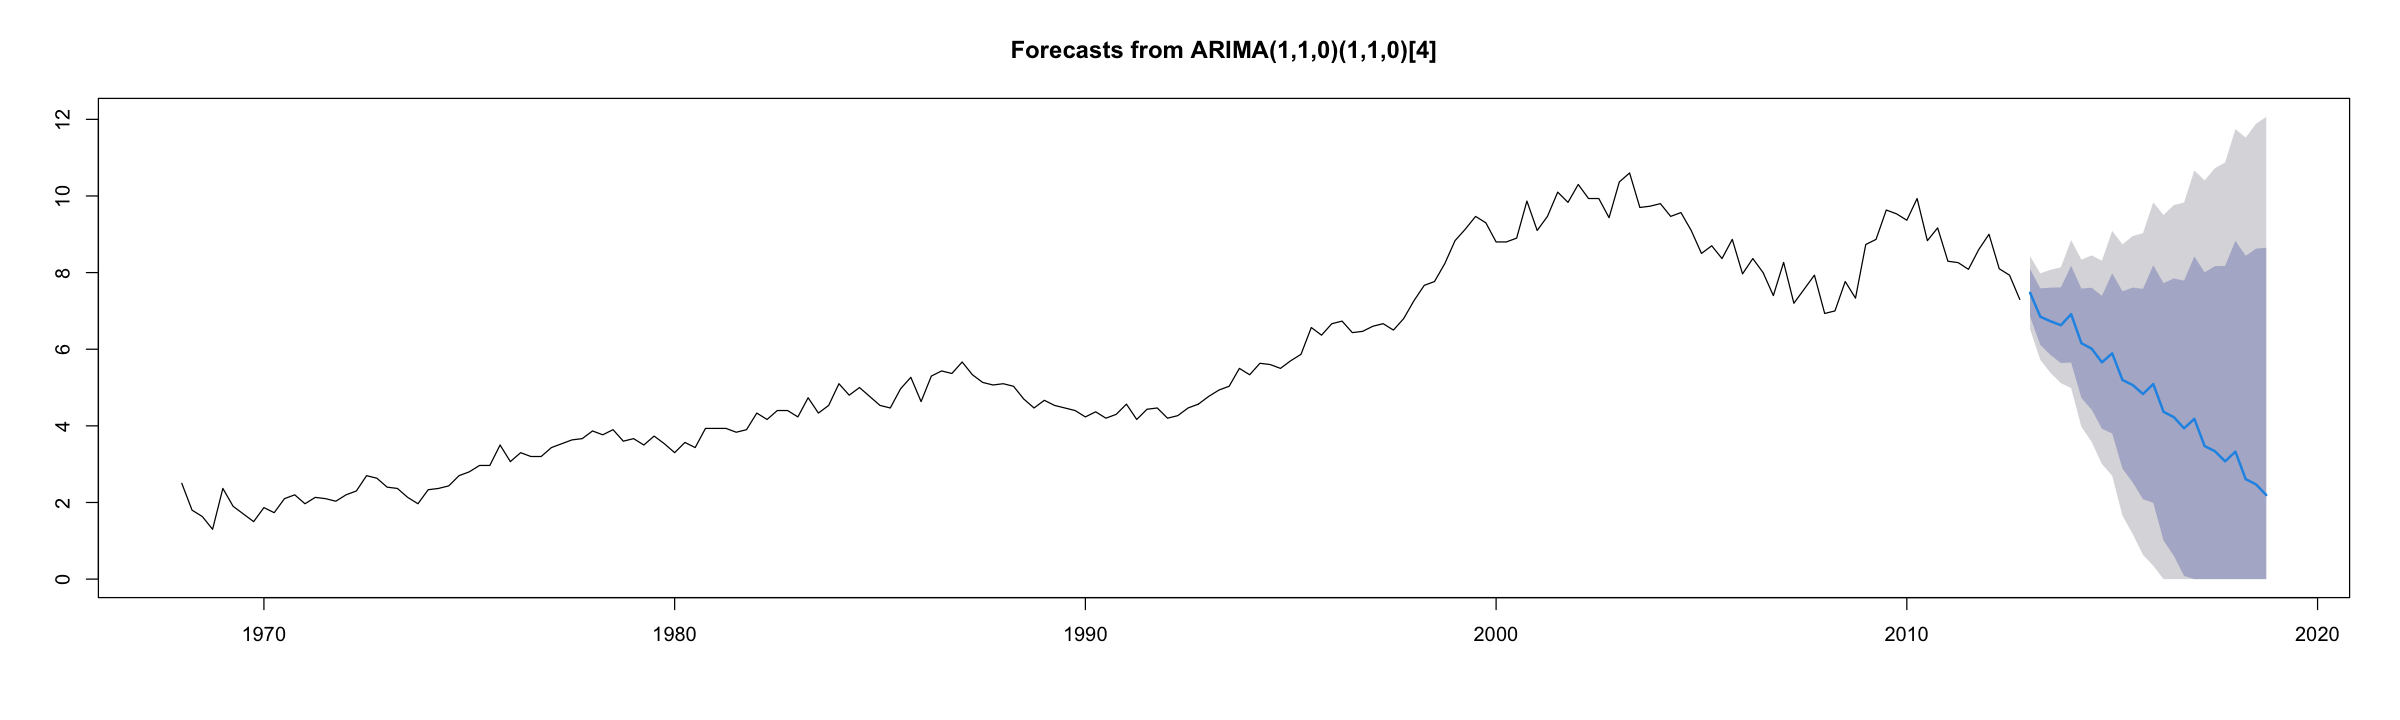

In [41]:
plot(fc_tmp)

In [42]:
accuracy(fc_tmp)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.008154072,0.4754839,0.3509497,-0.09199485,6.666763,0.6984102,-0.01757579


In [43]:
accuracy(fc_tmp, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.008154072,0.4754839,0.3509497,-0.09199485,6.666763,0.6984102,-0.01757579,NA
Test set,0.503928153,0.7709981,0.6425401,11.61658413,13.766724,1.2786921,0.55282511,2.761393


In [44]:
accuracy(fc2, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.008154072,0.4754839,0.3509497,-0.09199485,6.666763,0.6984102,-0.01757579,NA
Test set,0.503928153,0.7709981,0.6425401,11.61658413,13.766724,1.2786921,0.55282511,2.761393


In [45]:
m <- lm(residuals(fit5) ~ 1)
bgtest(m) 


	Breusch-Godfrey test for serial correlation of order up to 1

data:  m
LM test = 0.056717, df = 1, p-value = 0.8118


In [46]:
mean(fit5$residuals)

[1] -0.008154072

nėra koreliacijos

In [49]:
library(TSA)

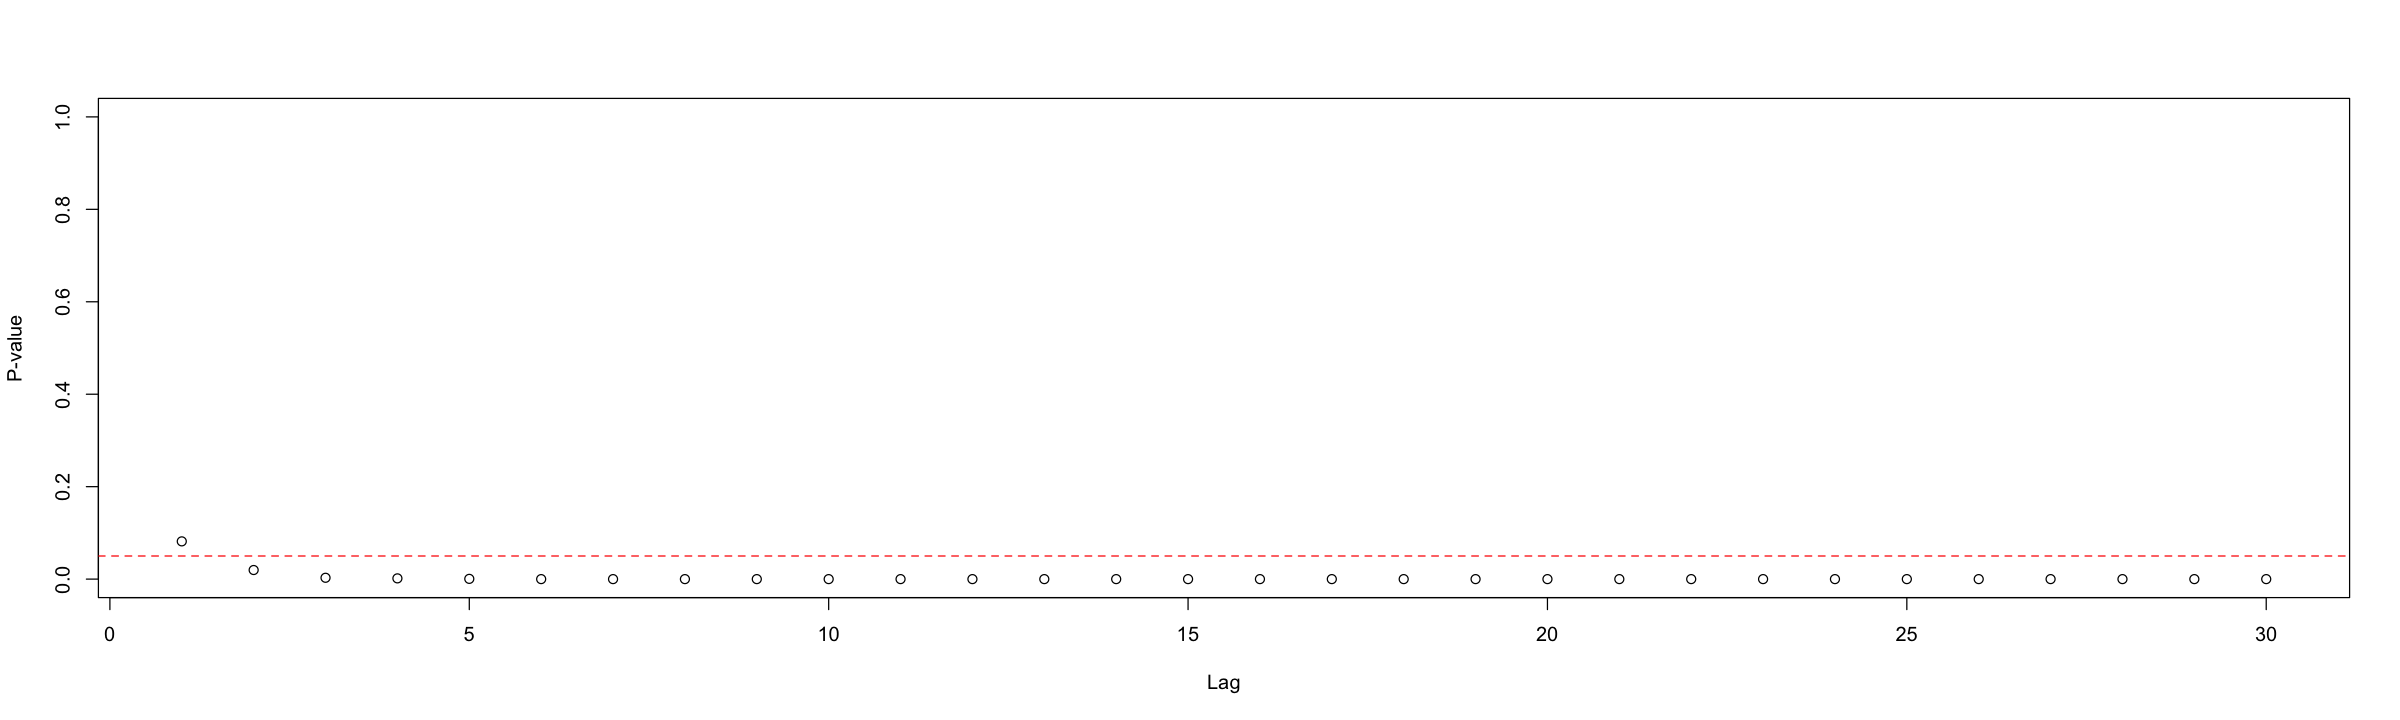

In [50]:
McLeod.Li.test(fit5, gof.lag = 30)

___

Dar vienas modelis...

In [51]:
decompose <- decompose(unts)

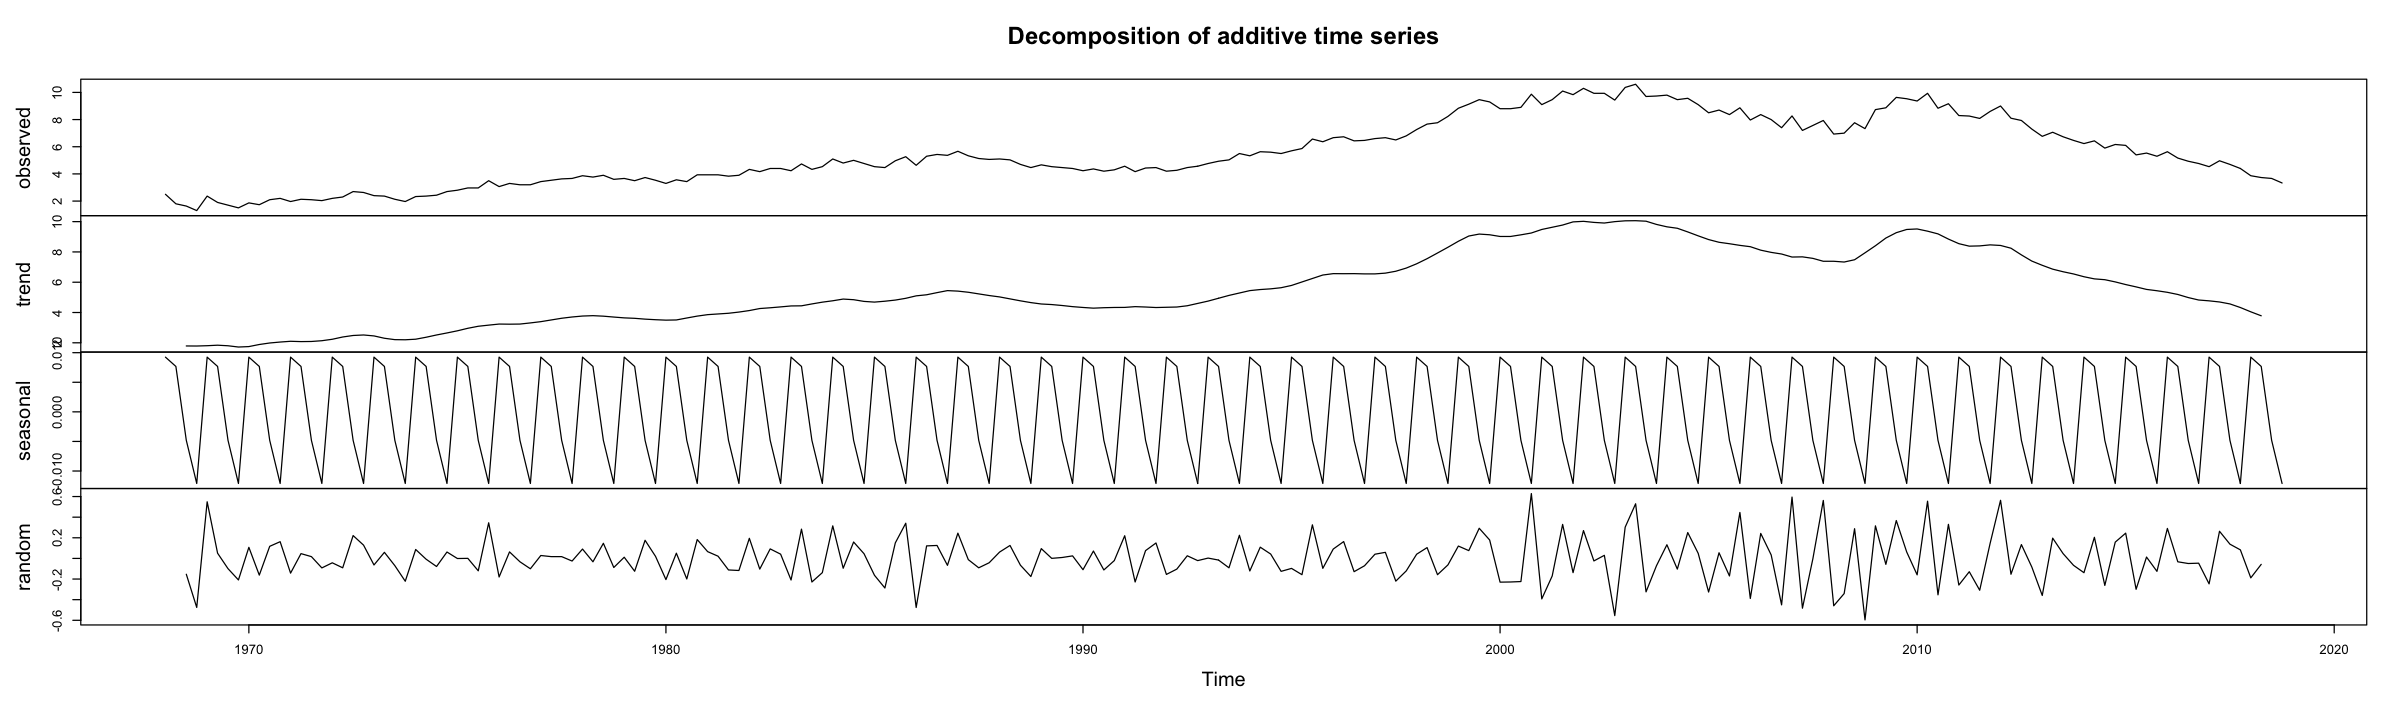

In [52]:
plot(decompose)

In [53]:
seas1 <- unts-decompose$seasonal

In [54]:
training1 <-window(seas1, end=c(2012,4))
test1 <-window(seas1, start=c(2013,1))

In [55]:
fit6 <- auto.arima(training1, trace=T, seasonal = T, d=1)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[4] with drift         : 124.1609
 ARIMA(0,1,0)           with drift         : 182.7772
 ARIMA(1,1,0)(1,0,0)[4] with drift         : 159.5493
 ARIMA(0,1,1)(0,0,1)[4] with drift         : 168.7114
 ARIMA(0,1,0)                              : 181.5555
 ARIMA(2,1,2)(0,0,1)[4] with drift         : 146.4996
 ARIMA(2,1,2)(1,0,0)[4] with drift         : 156.0411
 ARIMA(2,1,2)(2,0,1)[4] with drift         : 123.8402
 ARIMA(2,1,2)(2,0,0)[4] with drift         : 152.633
 ARIMA(2,1,2)(2,0,2)[4] with drift         : 125.5
 ARIMA(2,1,2)(1,0,2)[4] with drift         : 121.9384
 ARIMA(2,1,2)(0,0,2)[4] with drift         : 138.9468
 ARIMA(1,1,2)(1,0,2)[4] with drift         : 126.8411
 ARIMA(2,1,1)(1,0,2)[4] with drift         : 128.5711
 ARIMA(3,1,2)(1,0,2)[4] with drift         : 123.3024
 ARIMA(2,1,3)(1,0,2)[4] with drift         : 124.1289
 ARIMA(1,1,1)(1,0,2)[4] with drift         : 146.3596
 ARIMA(1,1,3)(1,0,2)[4] w

In [56]:
fit6 %>% forecast::forecast(h=length(test1)) -> fc3


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(1,0,2)[4] with drift
Q* = 7.7886, df = 3, p-value = 0.05059

Model df: 8.   Total lags used: 11



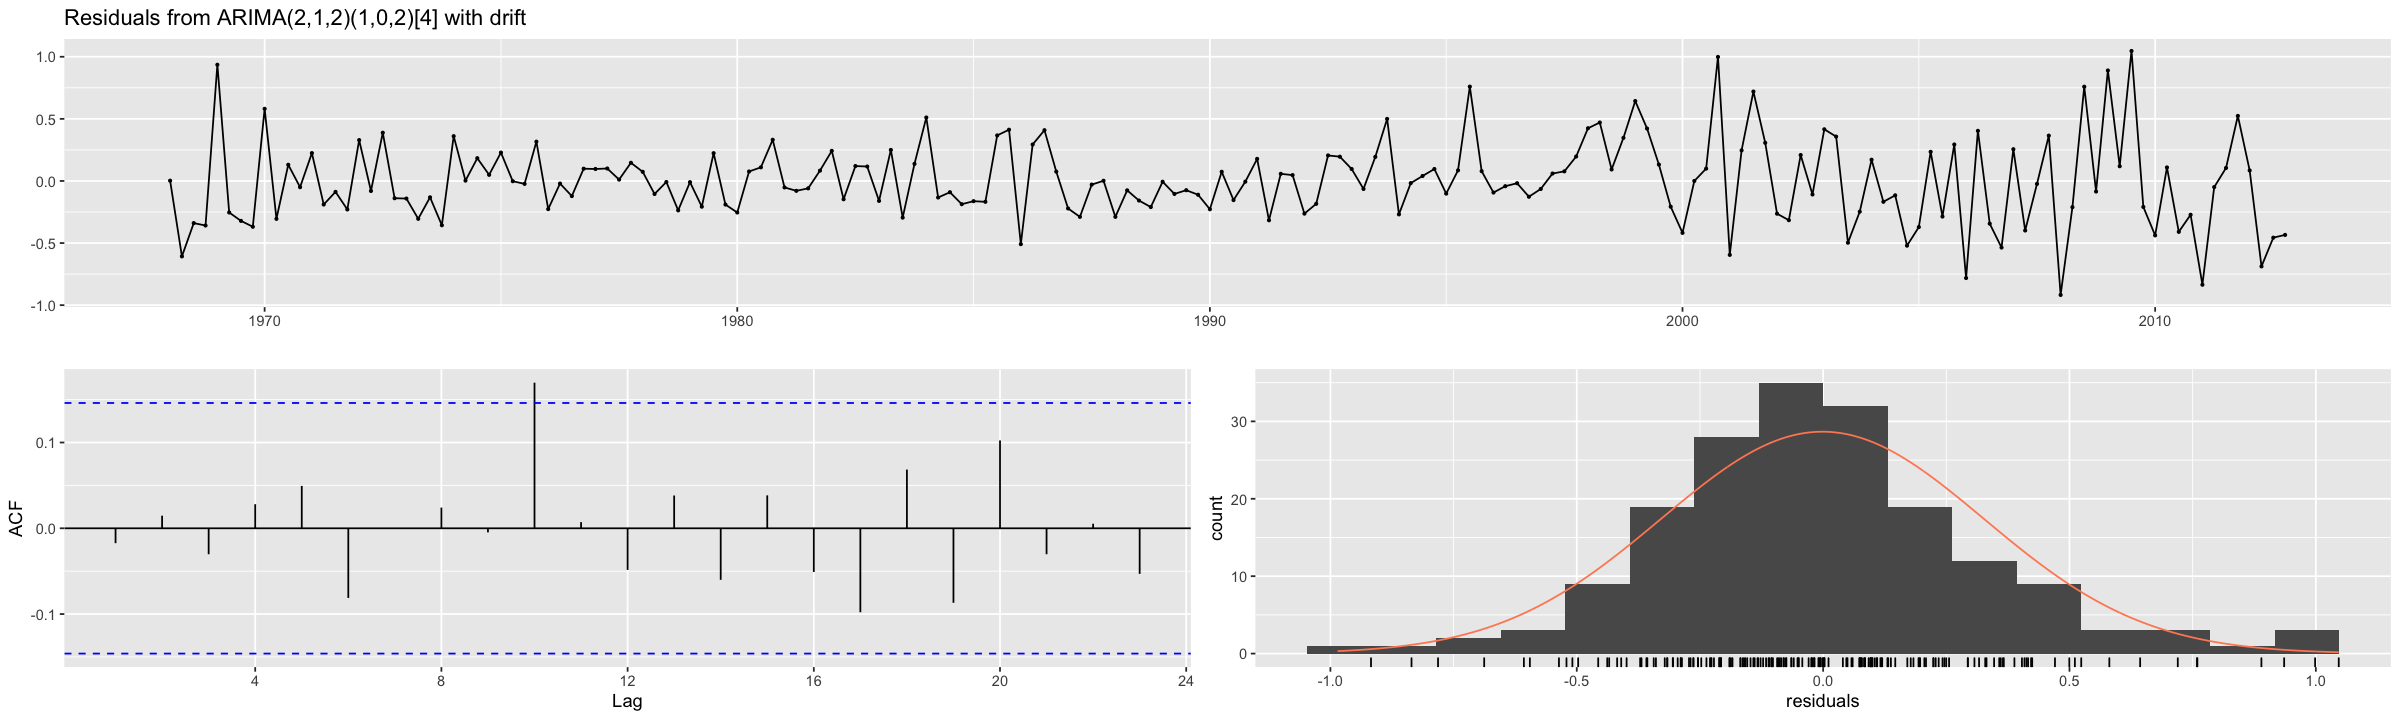

In [57]:
checkresiduals(fit6)

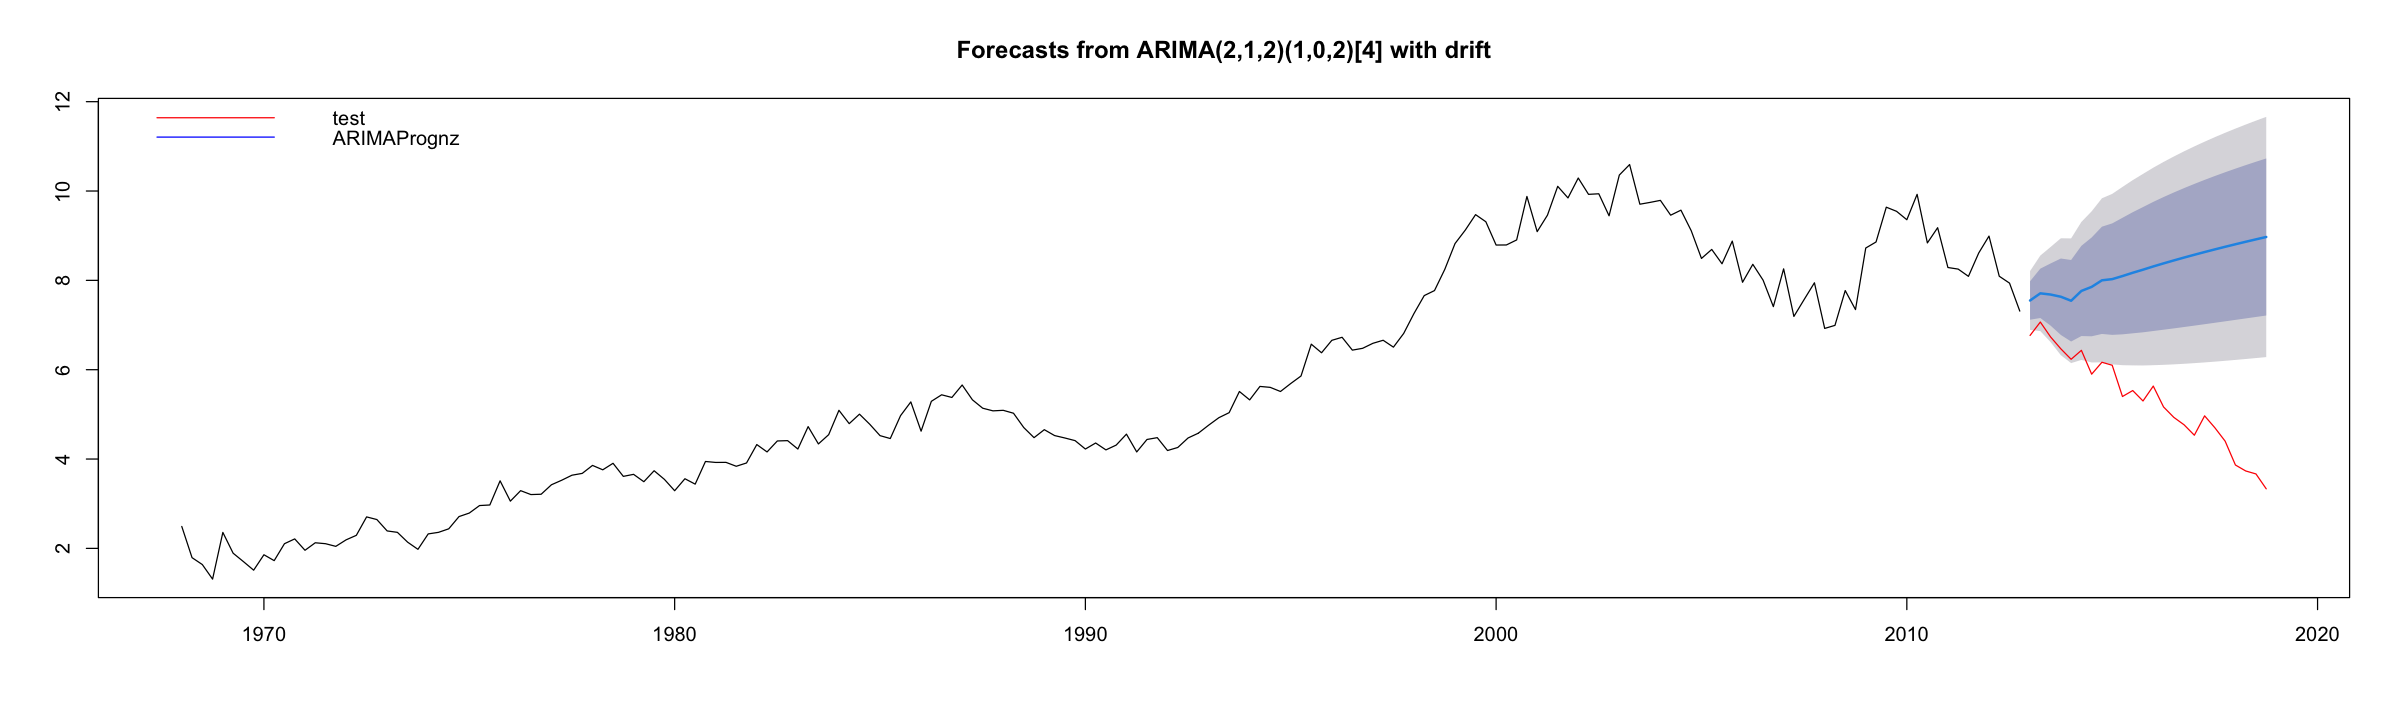

In [58]:
plot(fc3)
lines(test, col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("test","ARIMAPrognz")) 

Prognozės į lankas.

In [59]:
n <- lm(residuals(fit6) ~ 1)
bgtest(n) 


	Breusch-Godfrey test for serial correlation of order up to 1

data:  n
LM test = 0.054726, df = 1, p-value = 0.815


Taigi, naudosime $ARIMA(1,1,0)(1,1,0)_4$

Tačiau rezultatai labai dviprasmiai, modelis painktas pagal tai kaip gerai ir tiksliai prognozuojamos reikšmės atitinka realiais reikšmės, tačiau, pagal modelio prognozes matome, kad jos galėtų pasiekti minusines reikšmes, kas yra neįmanoma. Nedarbas negali būti minusinis.